# Segmenting Airbnb's Supply

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Graphs
import seaborn as sns
import matplotlib.pyplot as plt

# warnings
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_style("ticks")
odx = pd.IndexSlice
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
def read_url(link):
    """ Creates a pandas DataFrame from data online
    - Parameters:
        - link: link to the zipped data
    - Returns:
    """
    import io
    import requests
    import pandas as pd

    # Define URL and extract information
    response = requests.get(link)
    content = response.content
    # Convert into a Pandas DataFrame
    df = pd.read_csv(io.BytesIO(content), sep=',', compression='gzip')

    return df

In [5]:
listings = read_url('https://data.insideairbnb.com/mexico/df/mexico-city/2025-03-19/data/listings.csv.gz')
# Convert price to numeric (remove $ and ,)
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
print(listings.shape)

(26067, 79)


In [6]:
listings.head()

id                         listing_url       scrape_id last_scraped  \
0  35797  https://www.airbnb.com/rooms/35797  20250319150644   2025-03-21   
1  44616  https://www.airbnb.com/rooms/44616  20250319150644   2025-03-20   
2  56074  https://www.airbnb.com/rooms/56074  20250319150644   2025-03-20   
3  67703  https://www.airbnb.com/rooms/67703  20250319150644   2025-03-20   
4  70644  https://www.airbnb.com/rooms/70644  20250319150644   2025-03-22   

            source                                              name  \
0      city scrape                                       Villa Dante   
1  previous scrape                                      Condesa Haus   
2      city scrape              Great space in historical San Rafael   
3  previous scrape                 2 bedroom apt. deco bldg, Condesa   
4      city scrape  Beautiful light Studio Coyoacan- full equipped !   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  This great apartment is located in one of the ...   
3  Comfortably furnished, sunny, 2 bedroom apt., ...   
4  COYOACAN designer studio quiet & safe! well eq...   

                               neighborhood_overview  \
0  Santa Fe Shopping Mall, Interlomas Park and th...   
1                                                NaN   
2  Very traditional neighborhood with all service...   
3                                                NaN   
4  Coyoacan is a beautiful neighborhood famous fo...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f395ab78-1185...   153786   
1  https://a0.muscache.com/pictures/251410/ec75fe...   196253   
2  https://a0.muscache.com/pictures/3005118/60dac...   265650   
3  https://a0.muscache.com/pictures/3281720/6f078...   334451   
4  https://a0.muscache.com/pictures/f397d2da-d045...   212109   

                                   host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/153786      Dici  2010-06-28   
1  https://www.airbnb.com/users/show/196253  Fernando  2010-08-09   
2  https://www.airbnb.com/users/show/265650     Maris  2010-10-19   
3  https://www.airbnb.com/users/show/334451  Nicholas  2011-01-04   
4  https://www.airbnb.com/users/show/212109    Trisha  2010-08-24   

         host_location                                         host_about  \
0  Mexico City, Mexico  Master in visual arts, film photography & Mark...   
1  Mexico City, Mexico  Condesa Haus Rentals  offers independent  stud...   
2  Mexico City, Mexico  I am a University Professor now retired after ...   
3  Mexico City, Mexico  I am a journalist writing about food, (book an...   
4  Mexico City, Mexico  I am a mother, documentary film maker and phot...   

   host_response_time host_response_rate host_acceptance_rate  \
0                 NaN                NaN                  NaN   
1  within a few hours               100%                  90%   
2        within a day                88%                 100%   
3      within an hour               100%                  47%   
4  within a few hours               100%                  93%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/00de1...   
1                 f  https://a0.muscache.com/im/users/196253/profil...   
2                 f  https://a0.muscache.com/im/users/265650/profil...   
3                 t  https://a0.muscache.com/im/users/334451/profil...   
4                 t  https://a0.muscache.com/im/users/212109/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/00de1...                NaN   
1  https://a0.muscache.com/im/users/196253/profil...            Condesa   
2  https://a0.muscache.com/im/users/265650/profil...         San Rafael   
3  https://a0.muscache.com/im/u

In [7]:
calendar = read_url('https://data.insideairbnb.com/mexico/df/mexico-city/2025-03-19/data/calendar.csv.gz')
# Time series analysis with calendar data
calendar['date'] = pd.to_datetime(calendar['date'])
# Convert price to numeric (remove $ and ,)
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
print(calendar.shape)

(9514717, 7)


In [8]:
calendar.head()

listing_id       date available  price adjusted_price  minimum_nights  \
0      287940 2025-03-20         f  50.00            NaN            1.00   
1      287940 2025-03-21         f  50.00            NaN            1.00   
2      287940 2025-03-22         f  50.00            NaN            1.00   
3      287940 2025-03-23         f  50.00            NaN            1.00   
4      287940 2025-03-24         f  50.00            NaN            1.00   

   maximum_nights  
0         1125.00  
1         1125.00  
2         1125.00  
3         1125.00  
4         1125.00

## Visualize the data

3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]
pandas 2.2.3
geopandas 1.0.1
numpy 2.2.3
matplotlib 3.10.0


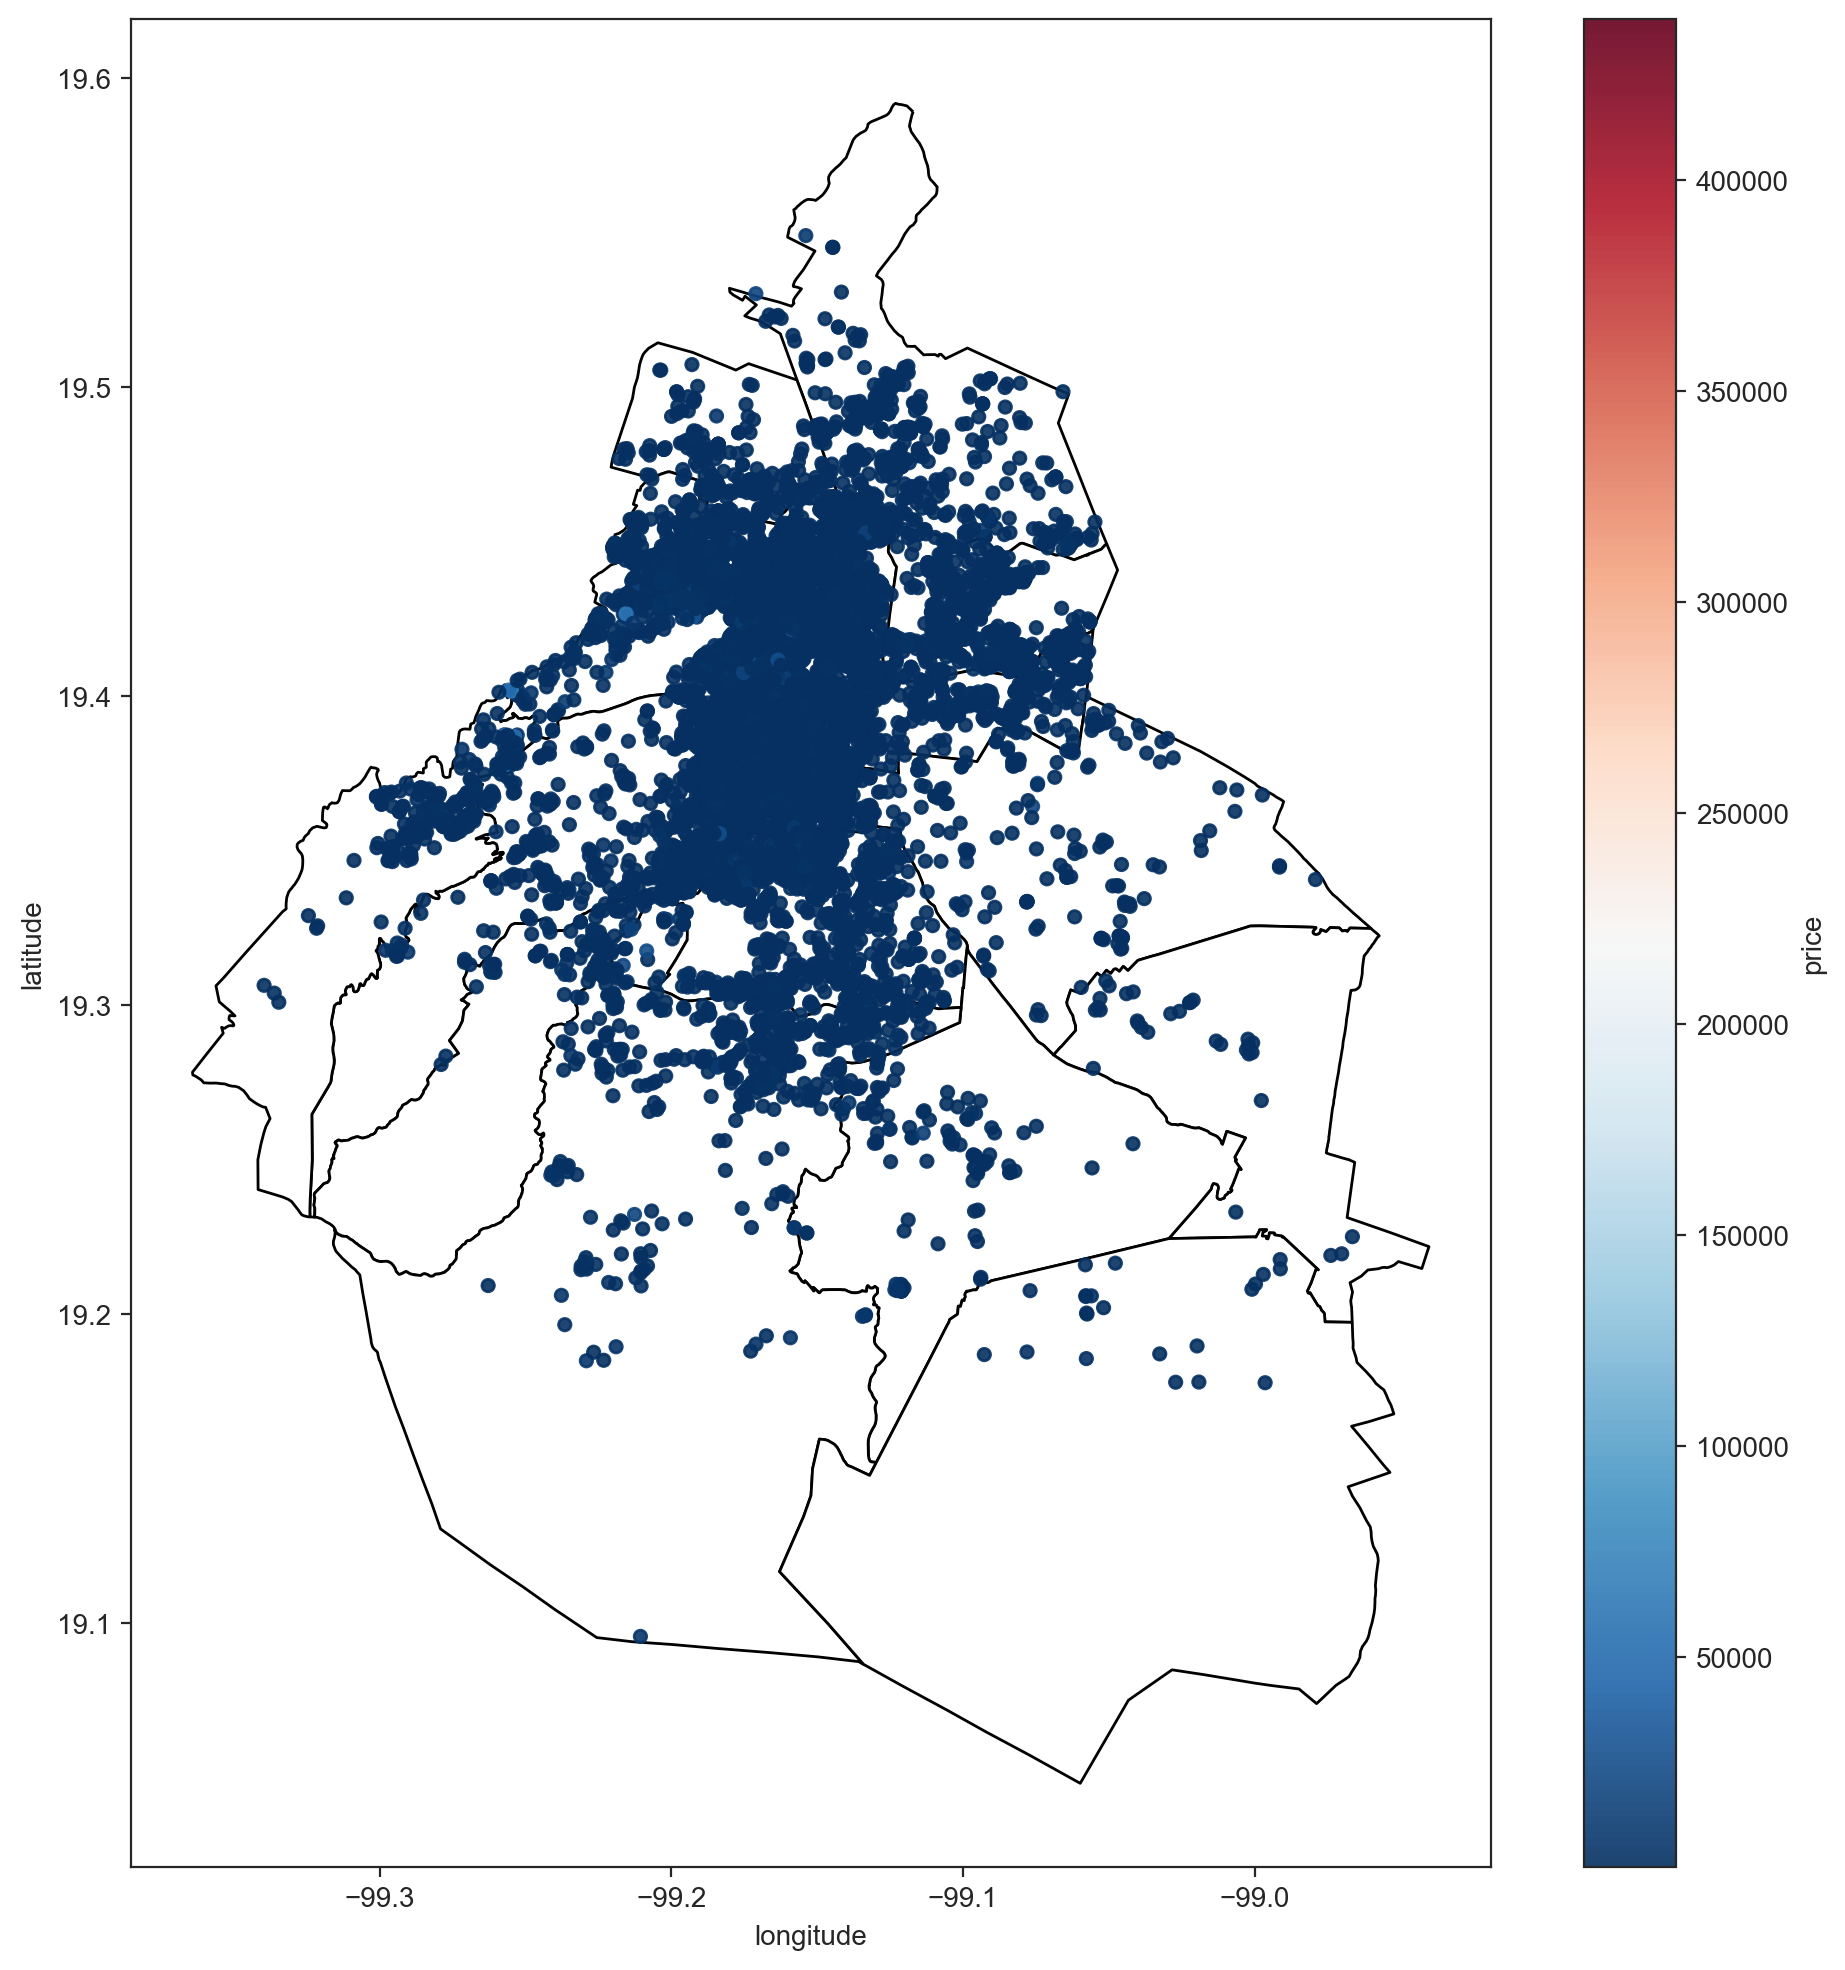

In [9]:
from math import ceil
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__name__, pd.__version__)
print(gpd.__name__, gpd.__version__)
print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

cdmx = gpd.read_file('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/mapa_mexico')\
    .query('CVE_EDO=="09"')\
    .set_index('CLAVE')

base = cdmx.plot(color='white', edgecolor='black', scheme="naturalbreaks")

above = listings.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.9,
    ax=base,
    #s=listings['price']*.01,
    #label="price",
    figsize=(12, 12),
    c="price",
    cmap=plt.get_cmap('RdBu_r'),
    colorbar=True)

plt.show()

## Availability rate

We can calculate the corresponding Nights Intended to be Available, or Nights Available, for the 365-day look-back period as the sum of Nights Vacant and Nights Booked. We then divide it by 365, to obtain the corresponding Availability Rate.

$$ \text{Availability Rate} = \frac{\text{Nights Vacant} + \text{Nights Boked} } { 365 }
$$

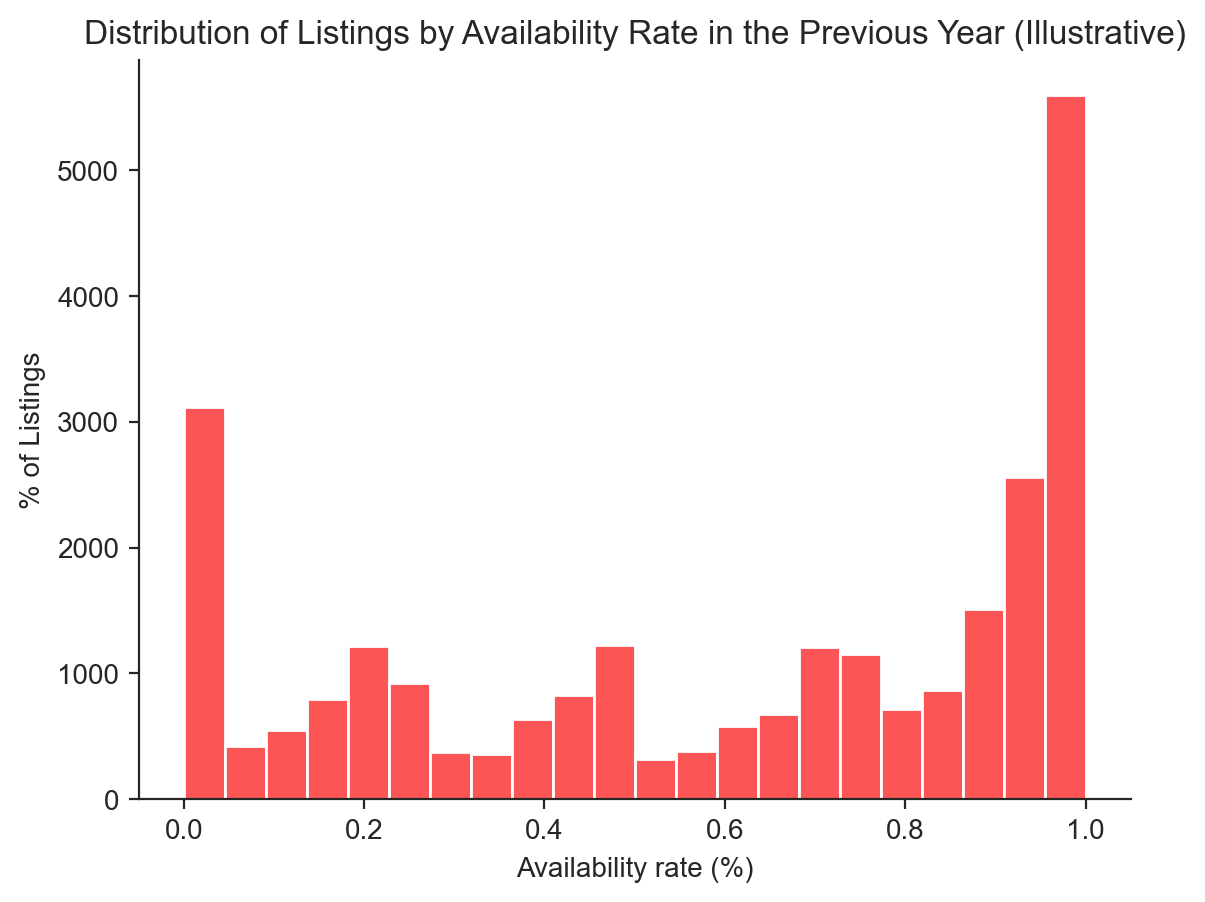

In [50]:
# We calculate the corresponding Nights Intended to be available.
listings['availability_rate'] = listings['availability_365'].map(lambda x: x/365)

# Plot the distribution
sns.histplot(listings['availability_rate'], color="#FC1C1C")
sns.despine()
plt.title("Distribution of Listings by Availability Rate in the Previous Year (Illustrative)")
plt.xlabel("Availability rate (%)")
plt.ylabel("% of Listings")
plt.show()

## Streakiness

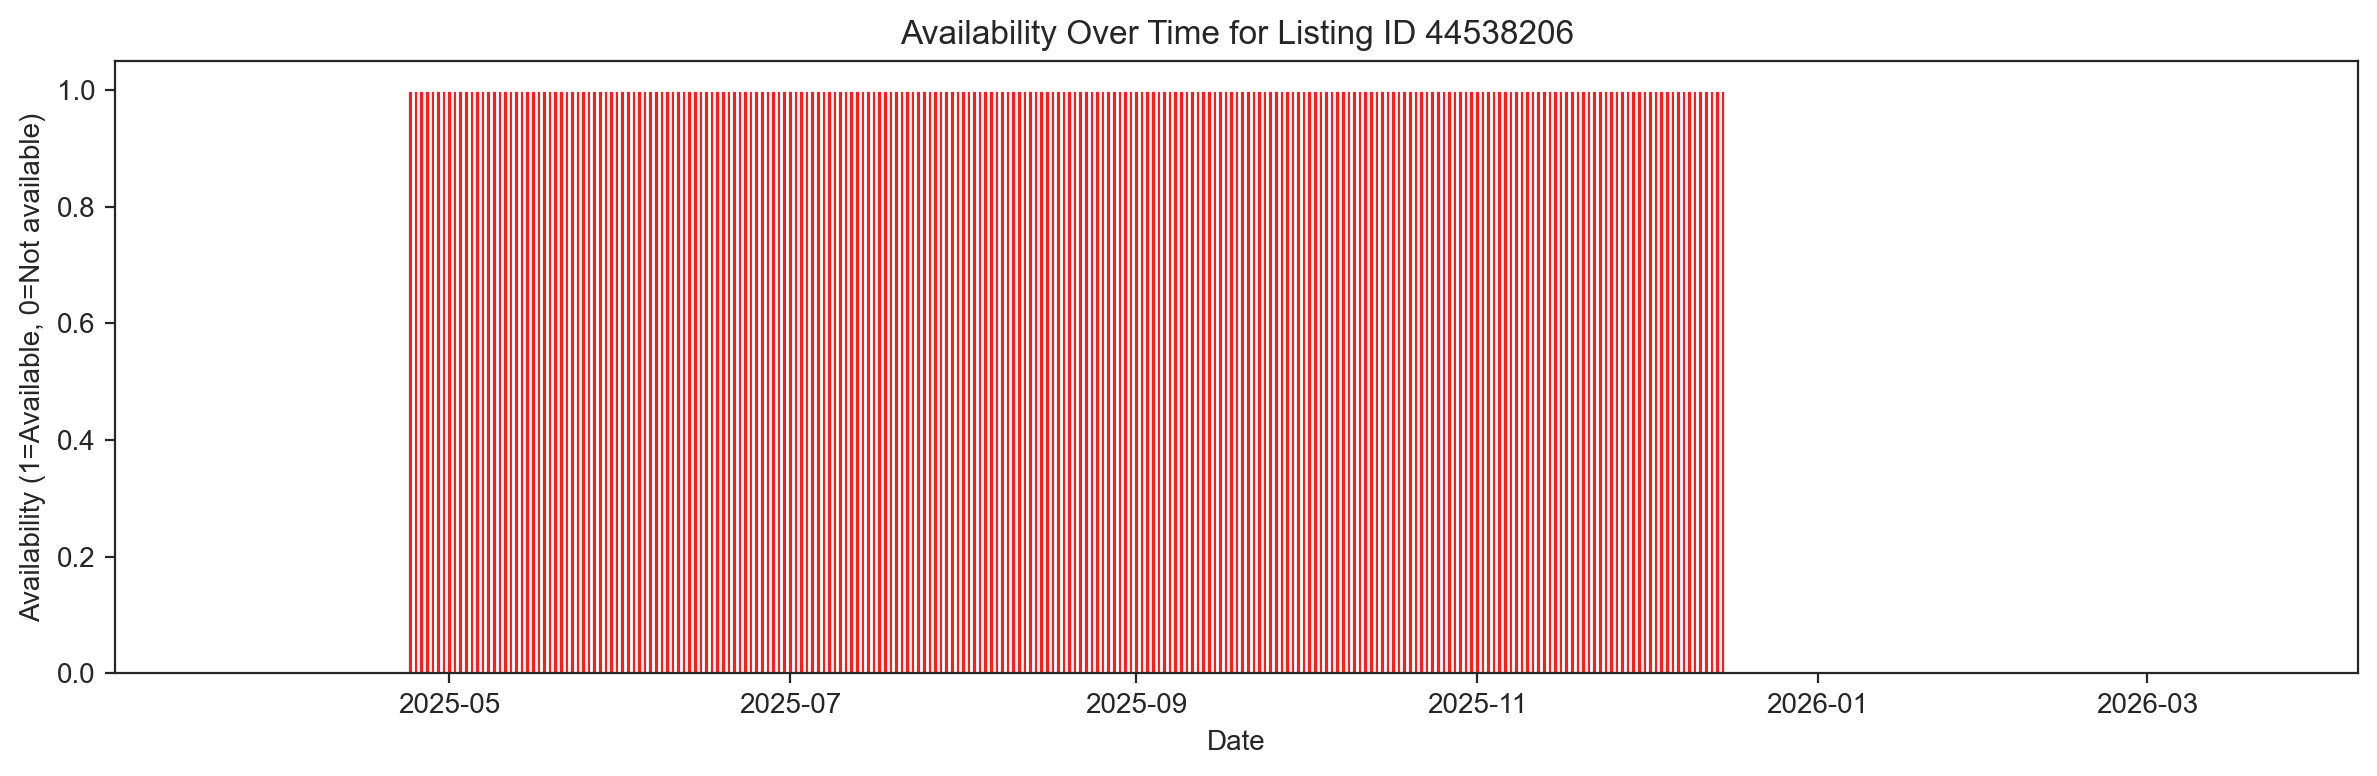

In [74]:
# get random listing on listings DataFrame
list_sample = listings.sample()
# Find the data in calendar DataFrame
listing_selected = calendar[calendar['listing_id'] == int(list_sample['id'])]
listing_selected['available'] = listing_selected['available'].map(lambda x: x == 't')

# Time series plot: availability by date for listing_selected
listing_selected['date'] = pd.to_datetime(listing_selected['date'])
plt.figure(figsize=(12,4))
#plt.plot(listing_selected['date'], listing_selected['available'].astype(int), marker='o', linestyle='-', color="#FF5A5F")
plt.bar(listing_selected['date'], listing_selected['available'].astype(int), color="#FC1C1C", width=1, align='center')
plt.ylabel('Availability (1=Available, 0=Not available)')
plt.xlabel('Date')
plt.title(f"Availability Over Time for Listing ID {listing_selected['listing_id'].iloc[0]}")
plt.tight_layout()
plt.show()


We define a streak as a consecutive sequence of availability with a minimum of 2 consecutive nights, followed by a subsequent period of at least 2 consecutive nights of unavailability.

In [12]:
# Find streaks of availability and unavailability in listing_selectec
def find_streaks(df, min_streak=2):
    """
    Finds streaks of available and unavailable periods with at least min_streak consecutive days.
    Returns a list of tuples: (start_date, end_date, available, streak_length)
    """
    streaks = []
    current = None
    streak_start = None
    streak_len = 0

    for idx, row in df.iterrows():
        avail = row['available']
        date = row['date']
        if current is None:
            current = avail
            streak_start = date
            streak_len = 1
        elif avail == current:
            streak_len += 1
        else:
            if streak_len >= min_streak:
                streaks.append((streak_start, date - pd.Timedelta(days=1), current, streak_len))
            current = avail
            streak_start = date
            streak_len = 1
    # Add last streak
    if streak_len >= min_streak:
        streaks.append((streak_start, date, current, streak_len))
    return streaks


def get_streaks(calendar_listing: pd.DataFrame) -> int:
    """
    Compute and return number streaks
    """

    # Ensure sorted by date
    listing_selected = calendar_listing.sort_values('date').reset_index(drop=True)

    # Find all streaks
    all_streaks = find_streaks(listing_selected, min_streak=2)

    # Count and return streaks
    streaks_by_listing = pd.DataFrame(all_streaks, columns=['available_start', 'available_end', 'available', 'available_length'])

    return streaks_by_listing[streaks_by_listing['available'] == 't'].shape[0]


# add new column with value of streaks
listings['streaks'] = listings['id'].map(
    lambda id : get_streaks(calendar[calendar['listing_id'] == int(id)])
)

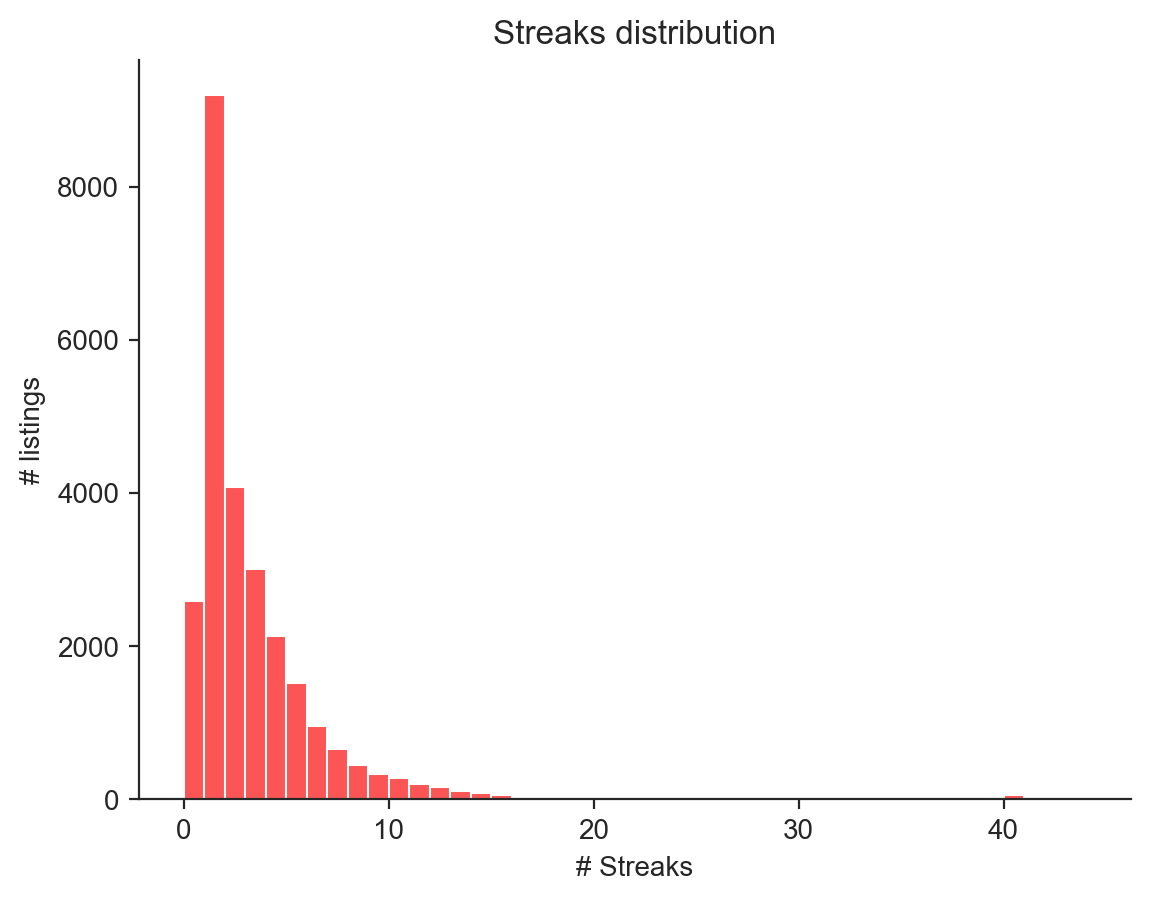

In [51]:
sns.histplot(listings['streaks'], color='#FC1C1C', binwidth=1)
sns.despine()
plt.title("Streaks distribution")
plt.xlabel("# Streaks")
plt.ylabel("# listings")
plt.show()

## Seasonality

In [14]:
def quarters_with_availability(calendar_listing: pd.DataFrame) -> int:
    """
    Returns the number of quarters (3-month periods) with at least one night available.
    """
    if calendar_listing.empty:
        return 0
    df = calendar_listing.copy()
    df['date'] = pd.to_datetime(df['date'])
    # Map 'available' to boolean if not already
    if df['available'].dtype != bool:
        df['available'] = df['available'].map(lambda x: x == 't')
    df['quarter'] = df['date'].dt.to_period('Q')
    quarters = df[df['available']].groupby('quarter').size()
    return len(quarters)

# Example: add as a feature to listings DataFrame
listings['quarters_with_availability'] = listings['id'].map(
    lambda id: quarters_with_availability(calendar[calendar['listing_id'] == int(id)])
)

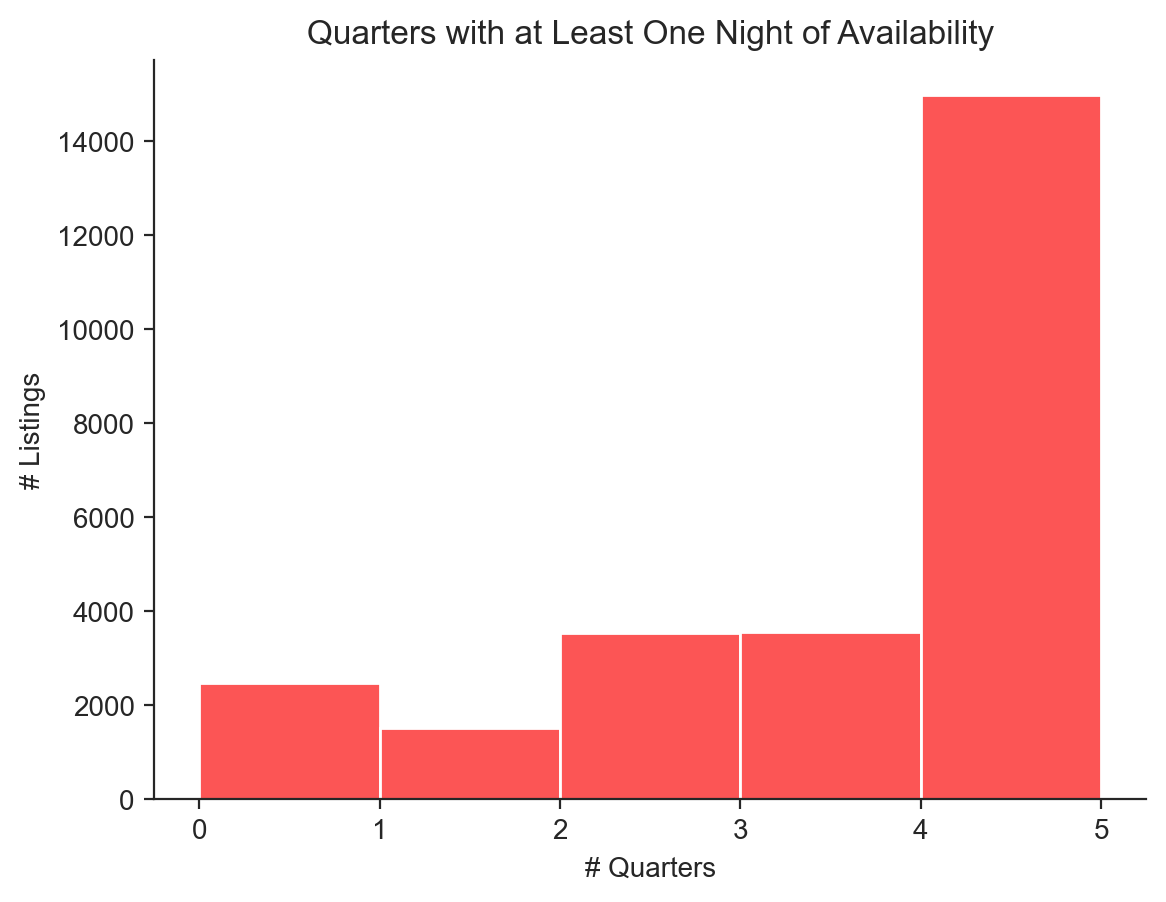

In [53]:
sns.histplot(listings['quarters_with_availability'], color='#FC1C1C', binwidth=1)
sns.despine()

plt.title("Quarters with at Least One Night of Availability")
plt.xlabel("# Quarters")
plt.ylabel("# Listings")
plt.show()

In [16]:
def max_consecutive_months_available(calendar_listing: pd.DataFrame) -> int:
    """
    Returns the maximum number of consecutive months with at least one night available.
    """
    if calendar_listing.empty:
        return 0
    df = calendar_listing.copy()
    df['date'] = pd.to_datetime(df['date'])
    # Map 'available' to boolean if not already
    if df['available'].dtype != bool:
        df['available'] = df['available'].map(lambda x: x == 't')
    # Get months with at least one available night
    months = df[df['available']].copy()
    if months.empty:
        return 0
    months['month'] = months['date'].dt.to_period('M')
    unique_months = sorted(months['month'].unique())
    # Find max consecutive months
    max_streak = streak = 1 if unique_months else 0
    for i in range(1, len(unique_months)):
        if unique_months[i-1] + 1 == unique_months[i]:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 1
    return max_streak

# Add as a feature to listings DataFrame
listings['max_consecutive_months_available'] = listings['id'].map(
    lambda id: max_consecutive_months_available(calendar[calendar['listing_id'] == int(id)])
)

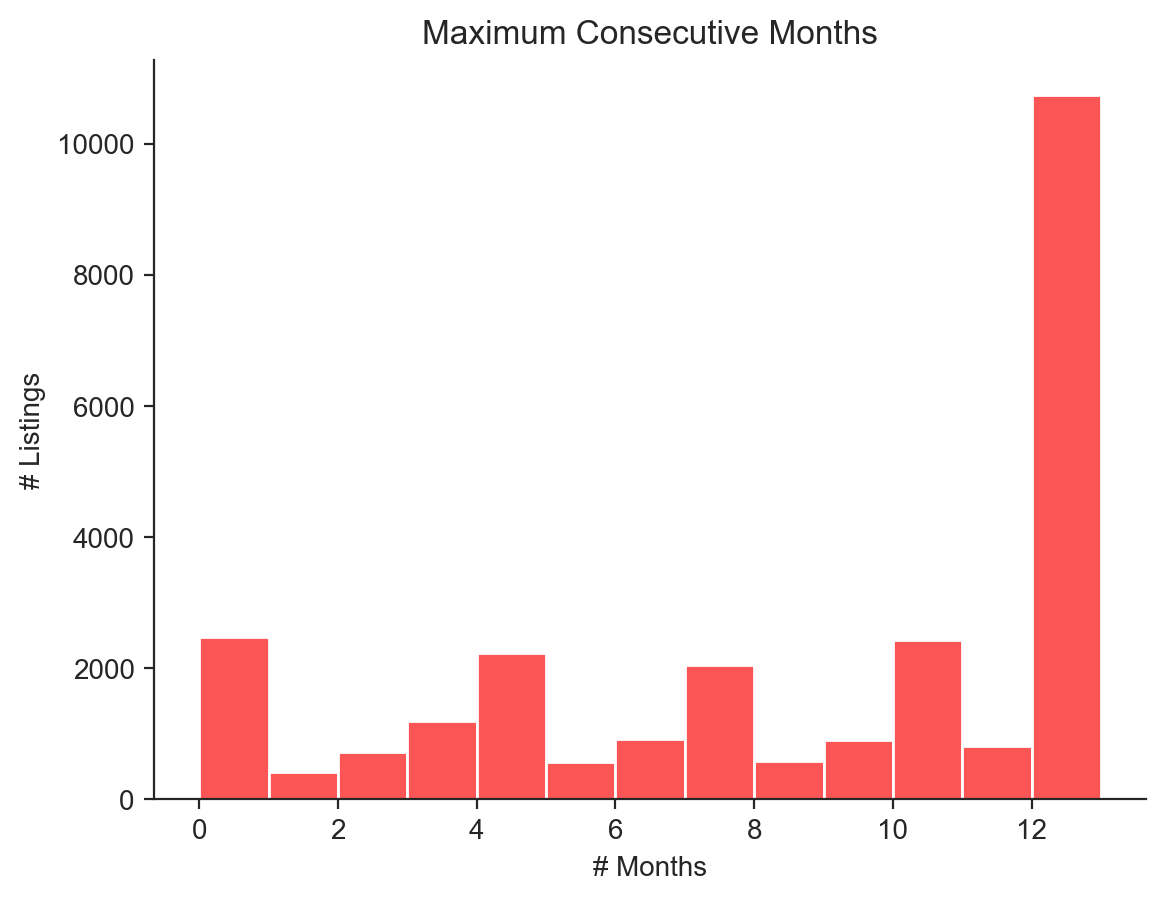

In [54]:
sns.histplot(listings['max_consecutive_months_available'], color='#FC1C1C', binwidth=1)
sns.despine()
plt.title("Maximum Consecutive Months")
plt.xlabel("# Months")
plt.ylabel("# Listings")
plt.show()

## Categorical variables

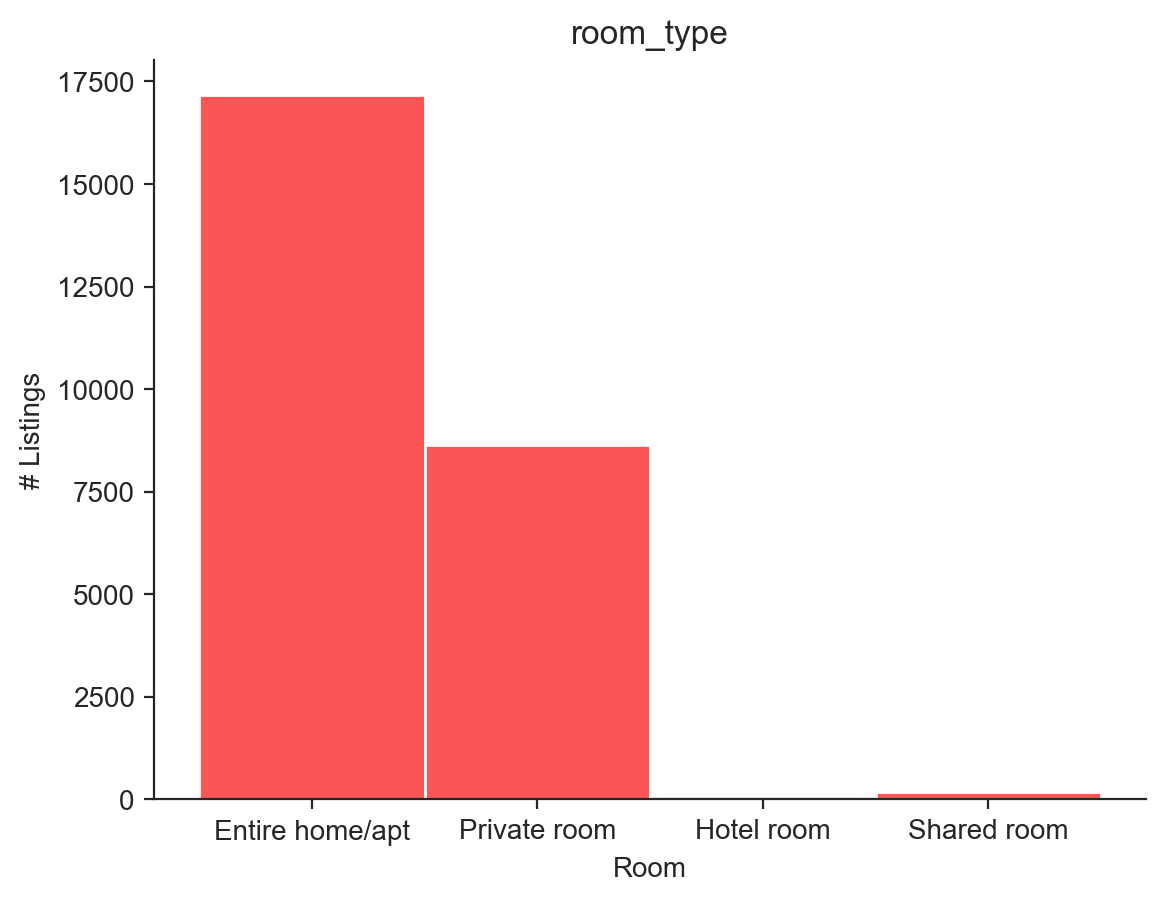

In [55]:
sns.histplot(listings['room_type'], color='#FC1C1C', binwidth=1)
sns.despine()
plt.title("room_type")
plt.xlabel("Room")
plt.ylabel("# Listings")
plt.show()

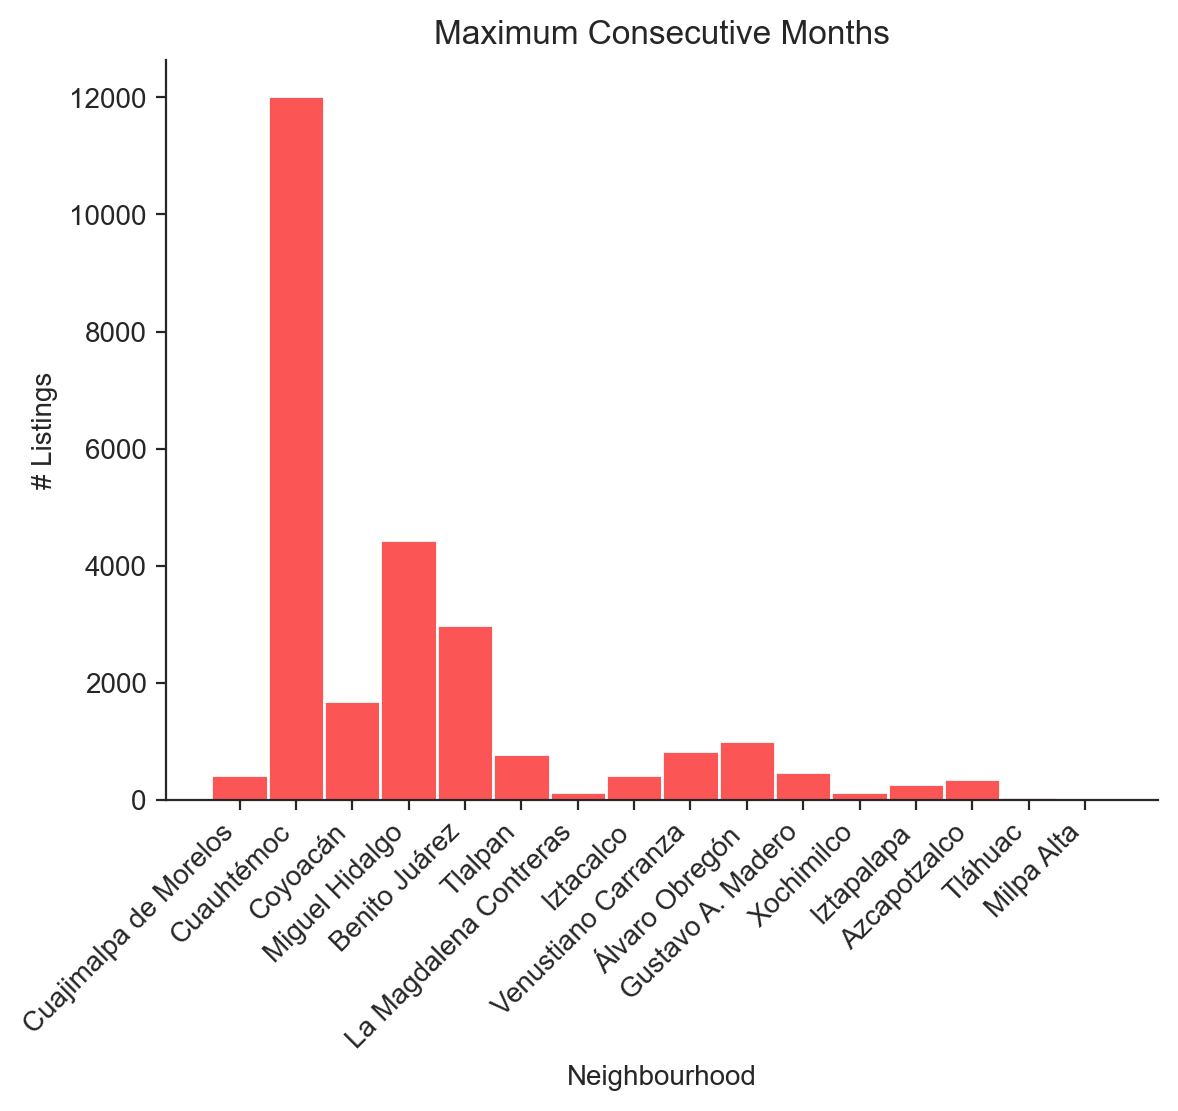

In [56]:
ax = sns.histplot(listings['neighbourhood_cleansed'], color='#FC1C1C', binwidth=1)
sns.despine()
plt.title("Maximum Consecutive Months")
plt.xlabel("Neighbourhood")
plt.ylabel("# Listings")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # ha='right' for right alignment
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

for x in listings[['room_type', 'neighbourhood_cleansed']].select_dtypes(include='object'):
    print(x)
    le = LabelEncoder()
    le.fit(listings[x])
    print(le.classes_)
    listings[x + '_le'] = le.transform(listings[x])


room_type
['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']
neighbourhood_cleansed
['Azcapotzalco' 'Benito Juárez' 'Coyoacán' 'Cuajimalpa de Morelos'
 'Cuauhtémoc' 'Gustavo A. Madero' 'Iztacalco' 'Iztapalapa'
 'La Magdalena Contreras' 'Miguel Hidalgo' 'Milpa Alta' 'Tlalpan'
 'Tláhuac' 'Venustiano Carranza' 'Xochimilco' 'Álvaro Obregón']


In [21]:
# Truncate values upper the percentile 99 
p99_values = {
    'price': listings['price'].quantile(.99)
}

for col, upper_limit in p99_values.items():
    #pass
    listings[col] = listings[col].clip(upper=upper_limit)

## Final Dataset

Select the variables to use

In [22]:
features = [
    'availability_rate', 
    'streaks', 
    'quarters_with_availability', 
    'max_consecutive_months_available', 
    'latitude', 'longitude', 
    'price',
    'room_type', 
    'neighbourhood_cleansed',
    'room_type_le', 
    'neighbourhood_cleansed_le',
    'id'  # include 'id' for reference
    ]

Create the final DataFrame

In [23]:
df = listings[features]

Save the data to avoid preprocessing

In [24]:
# Save the DataFrame to a Parquet file
df.to_parquet('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/notebooks/Project/output/Airbnb.parquet')

Read the data processed

In [25]:
df = pd.read_parquet('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/notebooks/Project/output/Airbnb.parquet')
df.head()

availability_rate  streaks  quarters_with_availability  \
0               0.99        1                           5   
1               1.00        1                           5   
2               0.99        1                           5   
3               0.84        1                           4   
4               0.67        3                           4   

   max_consecutive_months_available  latitude  longitude   price  \
0                                13     19.38     -99.27 3982.00   
1                                13     19.41     -99.18     NaN   
2                                13     19.44     -99.16  585.00   
3                                11     19.41     -99.17     NaN   
4                                 6     19.35     -99.16 1015.00   

         room_type neighbourhood_cleansed  room_type_le  \
0  Entire home/apt  Cuajimalpa de Morelos             0   
1  Entire home/apt             Cuauhtémoc             0   
2  Entire home/apt             Cuauhtémoc             0   
3  Entire home/apt             Cuauhtémoc             0   
4  Entire home/apt               Coyoacán             0   

   neighbourhood_cleansed_le     id  
0                          3  35797  
1                          4  44616  
2                          4  56074  
3                          4  67703  
4                          2  70644

Only select the data we'll need

In [26]:
# Select features for clustering
features_selected = [
    'availability_rate', 
    'streaks', 
    'quarters_with_availability', 
    'max_consecutive_months_available', 
    #'latitude', 'longitude', 
    #'price',
    #'room_type_le', 
    #'neighbourhood_cleansed_le'
    ]

In [27]:
df[features_selected].describe(percentiles=[0.01, .25, .5, .75, .99])

availability_rate  streaks  quarters_with_availability  \
count           26067.00 26067.00                    26067.00   
mean                0.60     2.92                        3.40   
std                 0.36     3.58                        1.65   
min                 0.00     0.00                        0.00   
1%                  0.00     0.00                        0.00   
25%                 0.24     1.00                        2.00   
50%                 0.71     2.00                        4.00   
75%                 0.94     4.00                        5.00   
99%                 1.00    15.00                        5.00   
max                 1.00    44.00                        5.00   

       max_consecutive_months_available  
count                          26067.00  
mean                               8.47  
std                                4.57  
min                                0.00  
1%                                 0.00  
25%                                4.00  
50%                               10.00  
75%                               13.00  
99%                               13.00  
max                               13.00

__Pairplot__

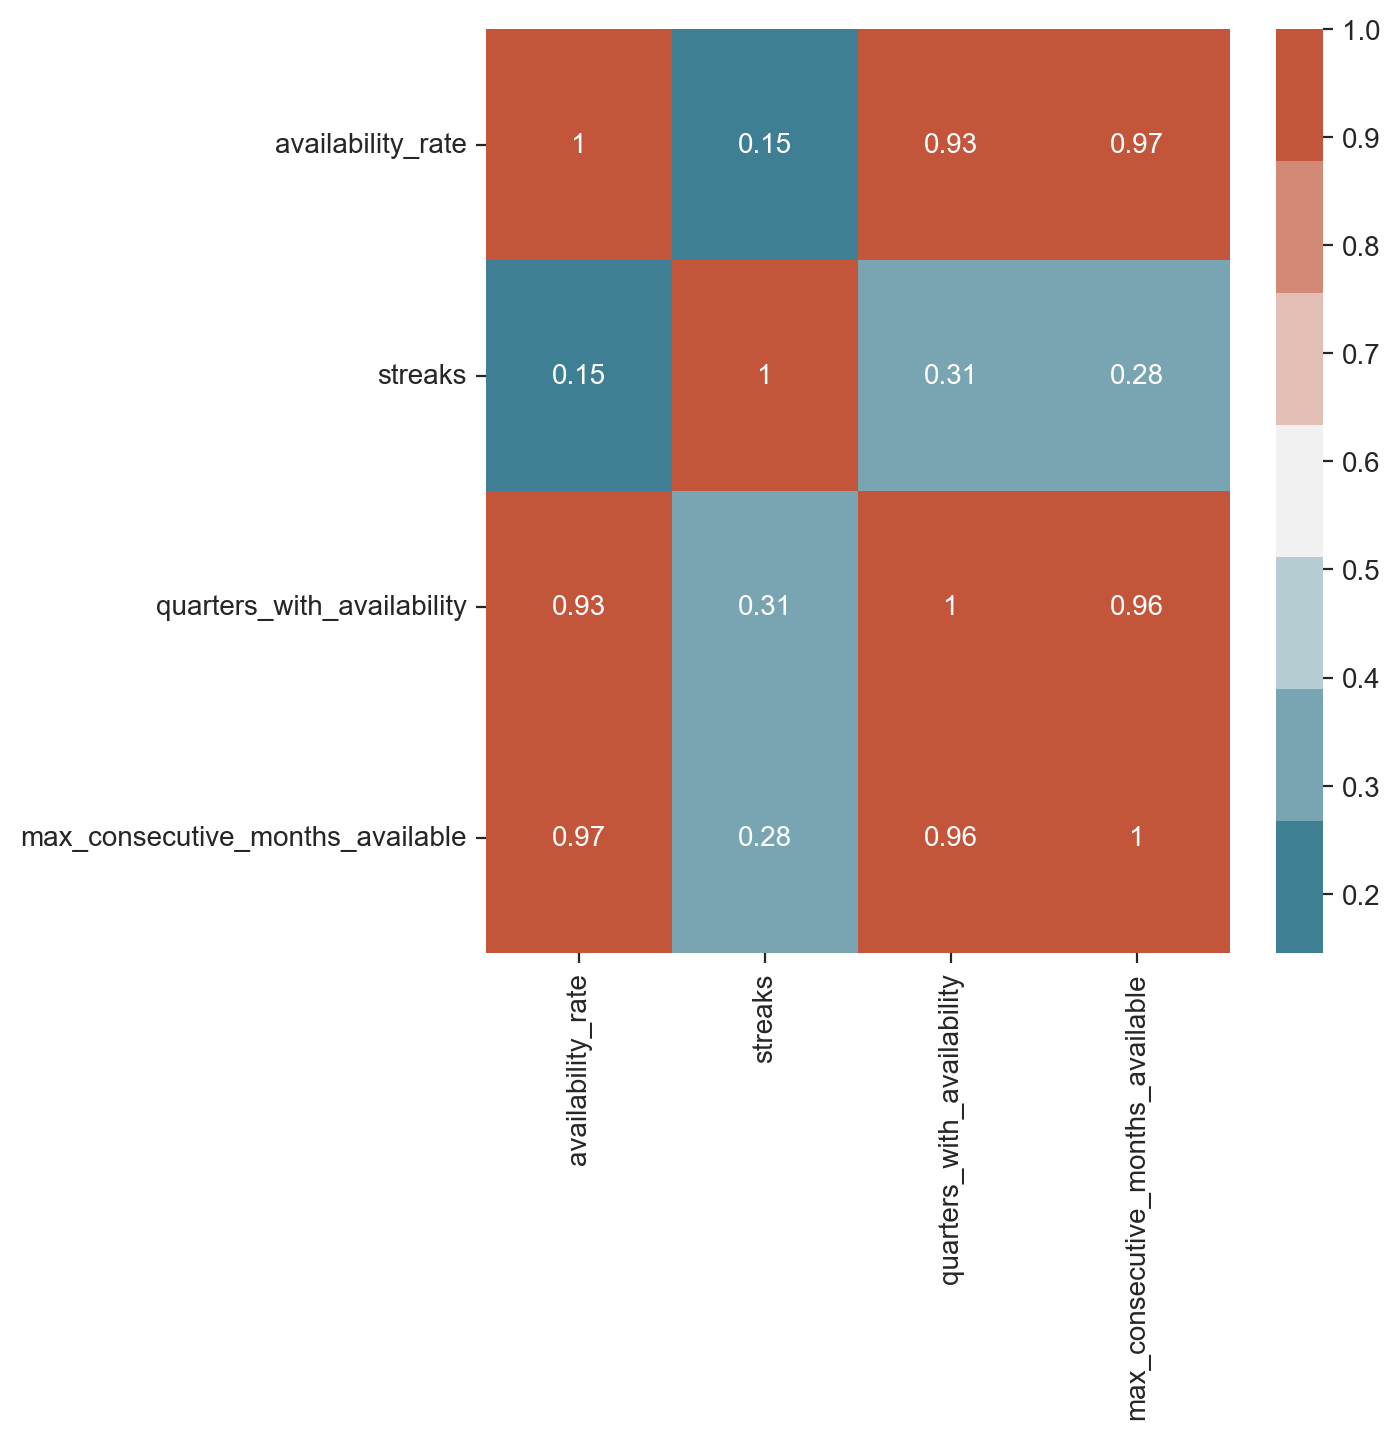

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(df[features_selected].corr(), annot=True, cmap=sns.diverging_palette(220, 20, n=7))
plt.show()

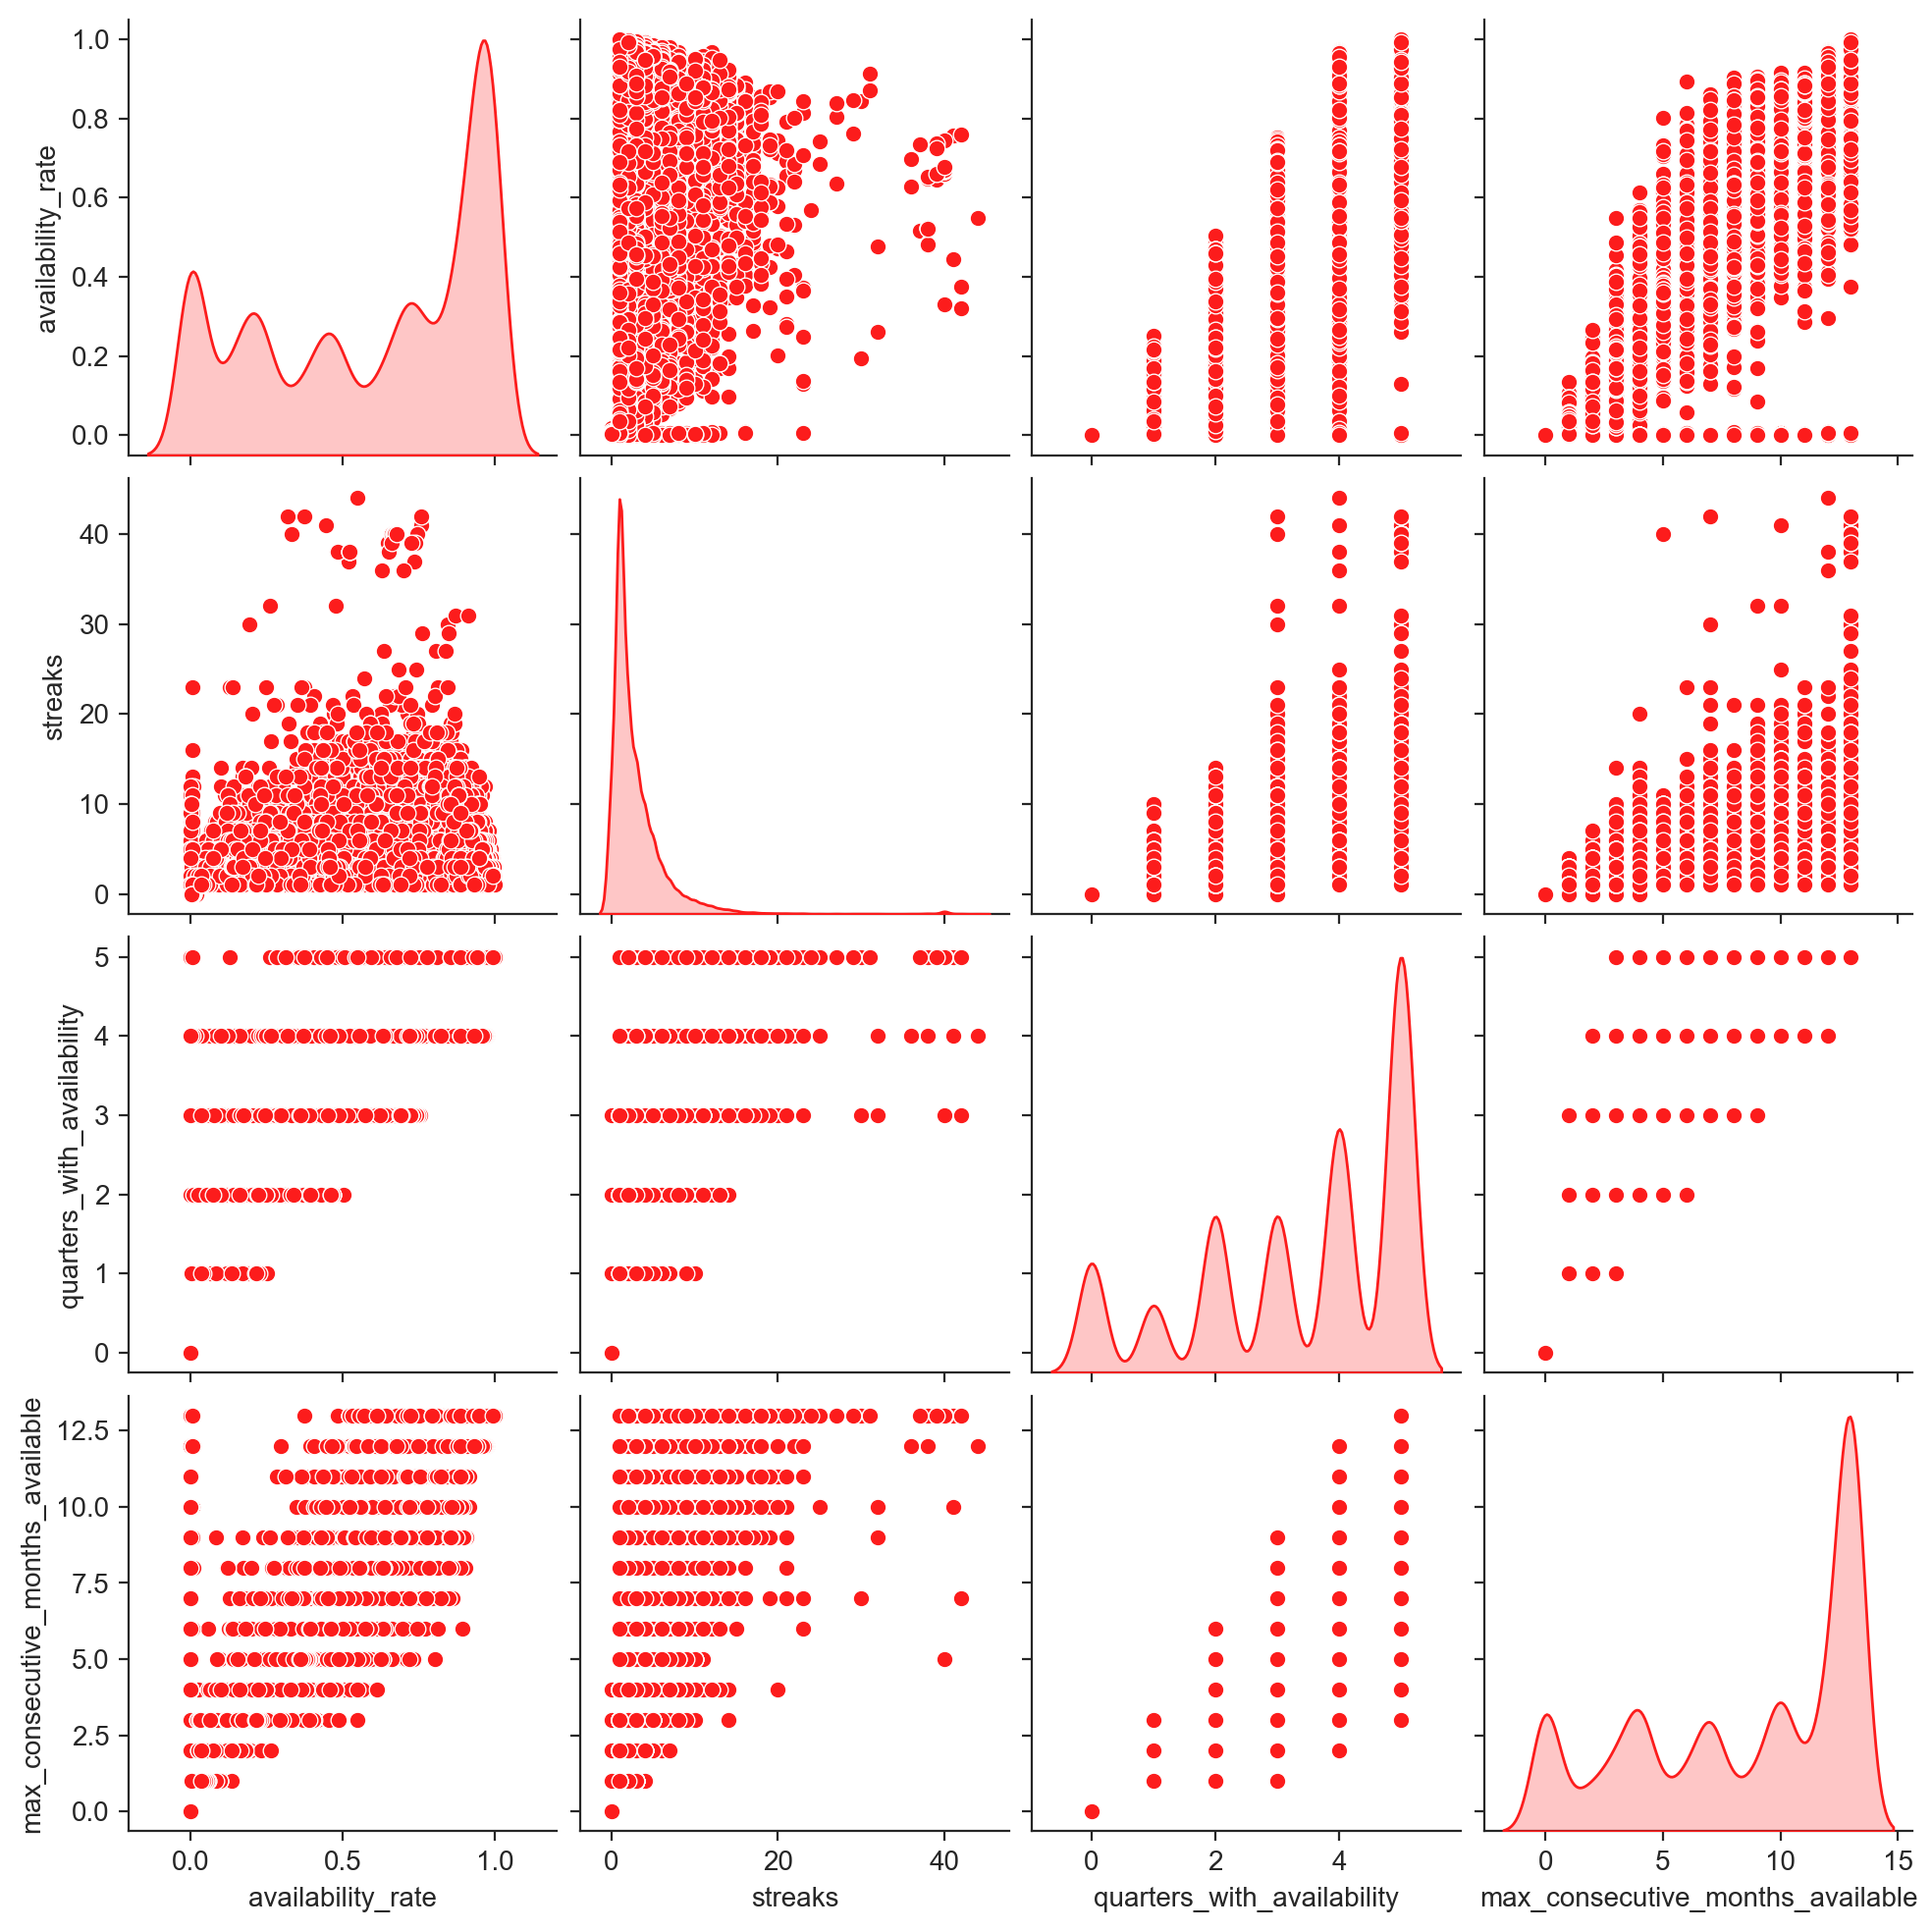

In [57]:
sns.pairplot(df[features_selected], 
             diag_kind="kde", 
             plot_kws={'color': '#FC1C1C'}, 
             diag_kws={'color': '#FC1C1C'},
             )
sns.despine()
plt.show()

## Modeling

### KMeans

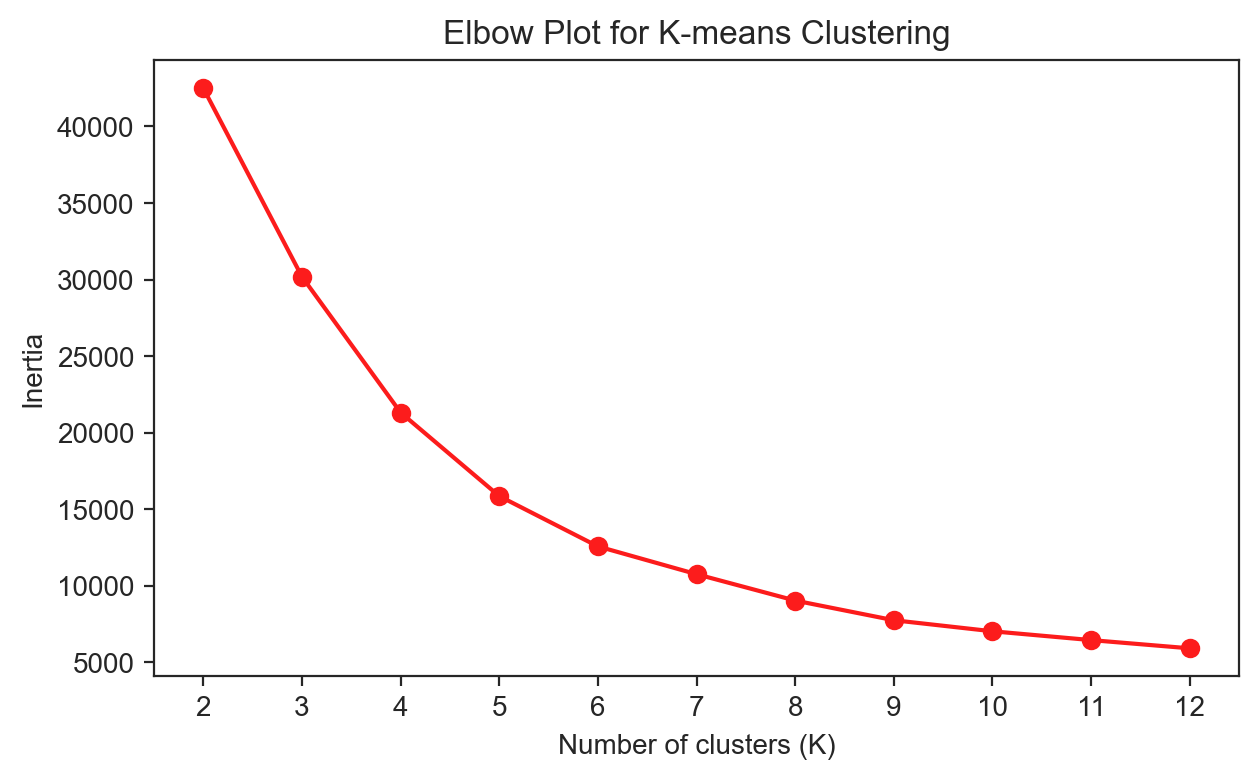

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[features_selected].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow plot to determine optimal K
inertia = []
K_range = range(2, 13)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker='o', color='#FC1C1C')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-means Clustering')
plt.xticks(K_range)
plt.show()

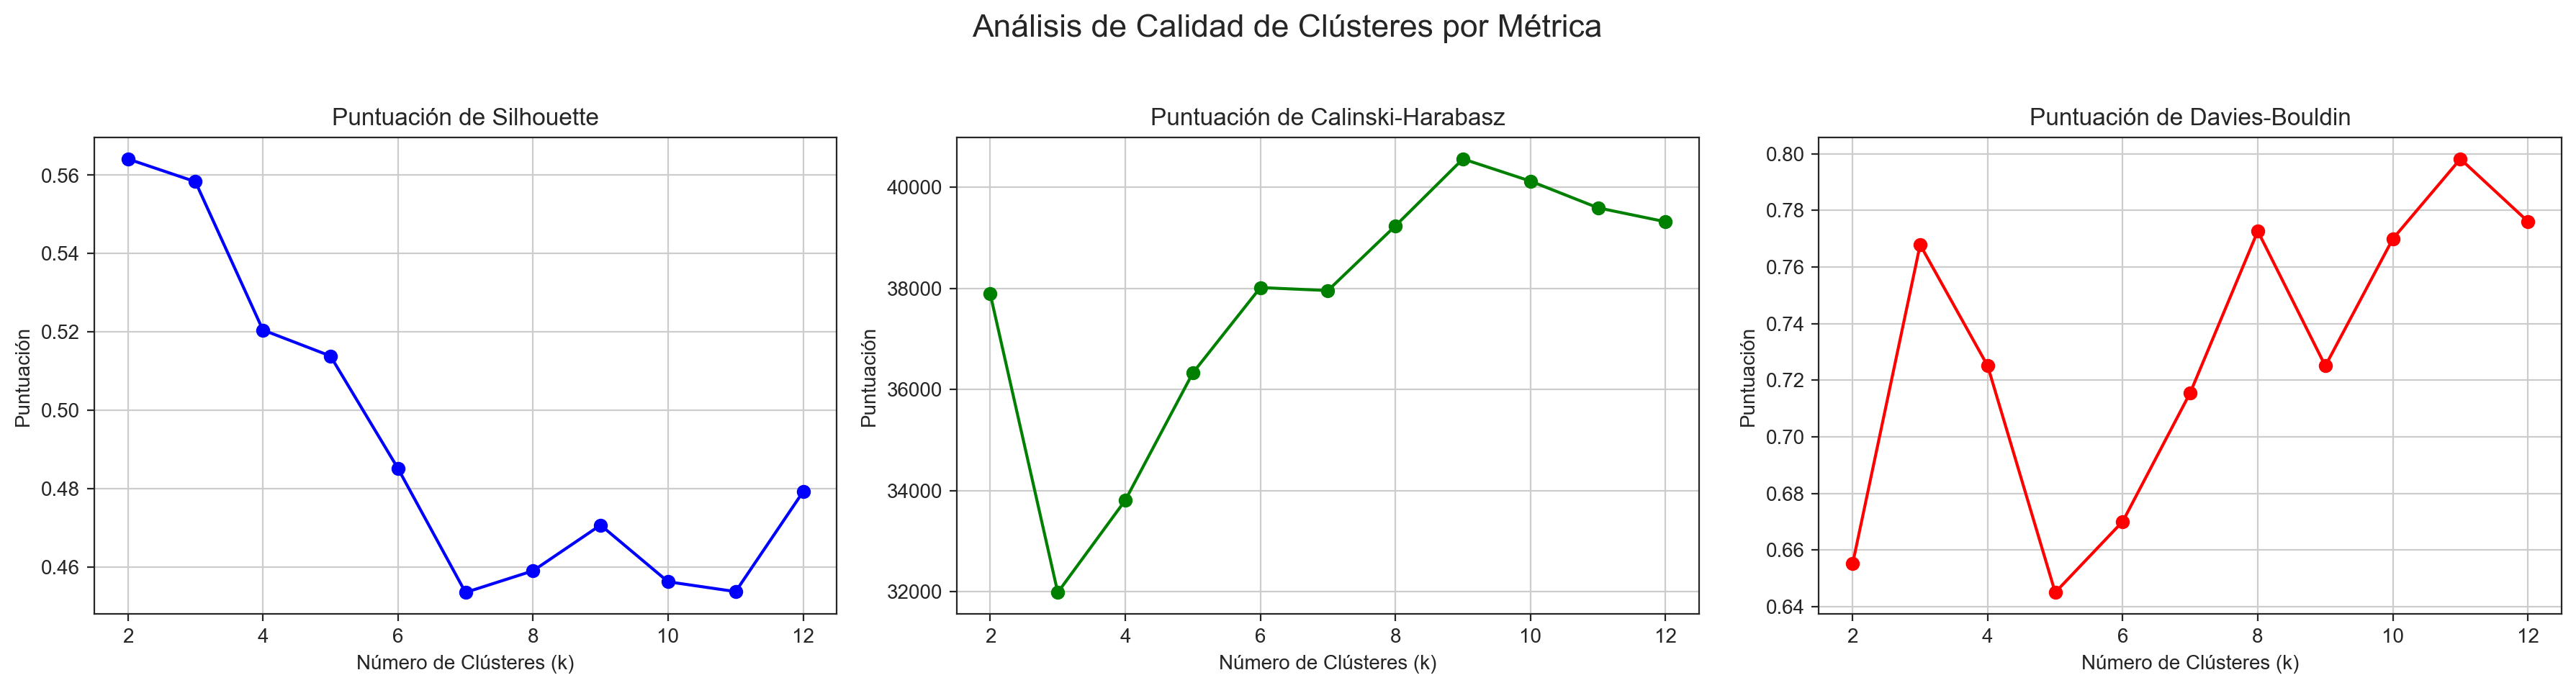

In [31]:
from sklearn.metrics import pairwise_distances, jaccard_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

distortions = []; silhouette_scores = []
davies_bouldin_scores = []; calinski_harabasz_scores = []
range_n_clusters = range(2, 13)  # Ajustamos para explorar desde 1 hasta 7 clusters

for n_clusters in range_n_clusters:
   km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=333)
   cluster_labels = km.fit_predict(X_scaled); distortions.append(km.inertia_)
   silhouette_ = silhouette_score(X_scaled, cluster_labels); silhouette_scores.append(silhouette_)
   davies_bouldin_ = davies_bouldin_score(X_scaled, cluster_labels); davies_bouldin_scores.append(davies_bouldin_)
   calinski_harabasz_ = calinski_harabasz_score(X_scaled, cluster_labels); calinski_harabasz_scores.append(calinski_harabasz_)

# Graficar las 3 métricas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Calidad de Clústeres por Métrica', fontsize=16)

# Silhouette Score
ax1.plot(range_n_clusters, silhouette_scores, marker='o', color='b')
ax1.set_title('Puntuación de Silhouette', fontsize=12)
ax1.set_xlabel('Número de Clústeres (k)')
ax1.set_ylabel('Puntuación')
ax1.grid(True)

#Calinski Harabasz
ax2.plot(range_n_clusters, calinski_harabasz_scores, marker='o', color='g')
ax2.set_title('Puntuación de Calinski-Harabasz', fontsize=12)
ax2.set_xlabel('Número de Clústeres (k)')
ax2.set_ylabel('Puntuación')
ax2.grid(True)

#Davies Bouldin
ax3.plot(range_n_clusters, davies_bouldin_scores, marker='o', color='r')
ax3.set_title('Puntuación de Davies-Bouldin', fontsize=12)
ax3.set_xlabel('Número de Clústeres (k)')
ax3.set_ylabel('Puntuación')
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Train a selected model with n clusters

In [32]:
# Number of clusters to use
n_clusters = 8

# Train KMeans with 5 clusters and add label to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['cluster_label'] = kmeans.predict(X_scaled)

Count data by cluster 

In [33]:
df['cluster_label'].value_counts()

cluster_label
7    7117
6    4156
0    3632
4    3566
1    3349
2    2920
3    1236
5      91
Name: count, dtype: int64

Describe the data by cluster

In [34]:
df[features_selected+['cluster_label']].groupby(['cluster_label']).describe()

availability_rate                                    streaks  \
                          count mean  std  min  25%  50%  75%  max   count   
cluster_label                                                                
0                       3632.00 0.42 0.11 0.00 0.39 0.45 0.48 0.70 3632.00   
1                       3349.00 0.88 0.09 0.42 0.84 0.91 0.94 0.99 3349.00   
2                       2920.00 0.00 0.01 0.00 0.00 0.00 0.00 0.08 2920.00   
3                       1236.00 0.67 0.20 0.00 0.57 0.72 0.83 0.97 1236.00   
4                       3566.00 0.72 0.09 0.00 0.68 0.72 0.76 0.90 3566.00   
5                         91.00 0.65 0.12 0.19 0.66 0.67 0.67 0.91   91.00   
6                       4156.00 0.19 0.08 0.00 0.13 0.19 0.23 0.42 4156.00   
7                       7117.00 0.97 0.04 0.73 0.95 0.98 0.99 1.00 7117.00   

                                                        \
               mean  std   min   25%   50%   75%   max   
cluster_label                                            
0              3.12 2.11  1.00  1.00  3.00  4.00 11.00   
1              5.54 1.45  4.00  4.00  5.00  7.00  9.00   
2              0.13 0.37  0.00  0.00  0.00  0.00  2.00   
3             11.94 3.02  7.00 10.00 11.00 13.00 25.00   
4              1.86 1.15  1.00  1.00  1.00  3.00  5.00   
5             38.49 3.57 27.00 38.50 40.00 40.00 44.00   
6              2.21 1.56  0.00  1.00  2.00  3.00 10.00   
7              1.65 0.78  1.00  1.00  1.00  2.00  3.00   

              quarters_with_availability                                     \
                                   count mean  std  min  25%  50%  75%  max   
cluster_label                                                                 
0                                3632.00 2.98 0.59 2.00 3.00 3.00 3.00 5.00   
1                                3349.00 4.79 0.40 4.00 5.00 5.00 5.00 5.00   
2                                2920.00 0.15 0.36 0.00 0.00 0.00 0.00 1.00   
3                                1236.00 4.47 0.69 2.00 4.00 5.00 5.00 5.00   
4                                3566.00 3.84 0.47 3.00 4.00 4.00 4.00 5.00   
5                                  91.00 4.85 0.47 3.00 5.00 5.00 5.00 5.00   
6                                4156.00 1.77 0.49 1.00 1.00 2.00 2.00 4.00   
7                                7117.00 4.81 0.39 4.00 5.00 5.00 5.00 5.00   

              max_consecutive_months_available                              \
                                         count  mean  std  min   25%   50%   
cluster_label                                                                
0                                      3632.00  6.59 1.31 2.00  6.00  7.00   
1                                      3349.00 12.41 1.15 6.00 12.00 13.00   
2                                      2920.00  0.18 0.45 0.00  0.00  0.00   
3                                      1236.00 11.26 2.17 3.00 10.00 12.00   
4                                      3566.00  9.71 1.00 5.00  9.00 10.00   
5                                        91.00 12.63 1.34 5.00 13.00 13.00   
6                                      4156.00  3.43 0.89 1.00  3.00  4.00   
7                                      7117.00 12.75 0.51 9.00 13.00 13.00   

                           
                75%   max  
cluster_label              
0              7.00 13.00  
1             13.00 13.00  
2              0.00  3.00  
3             13.00 13.00  
4             10.00 13.00  
5             13.00 13.00  
6              4.00  7.00  
7             13.00 13.00

3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]
pandas 2.2.3
geopandas 1.0.1
numpy 2.2.3
matplotlib 3.10.0


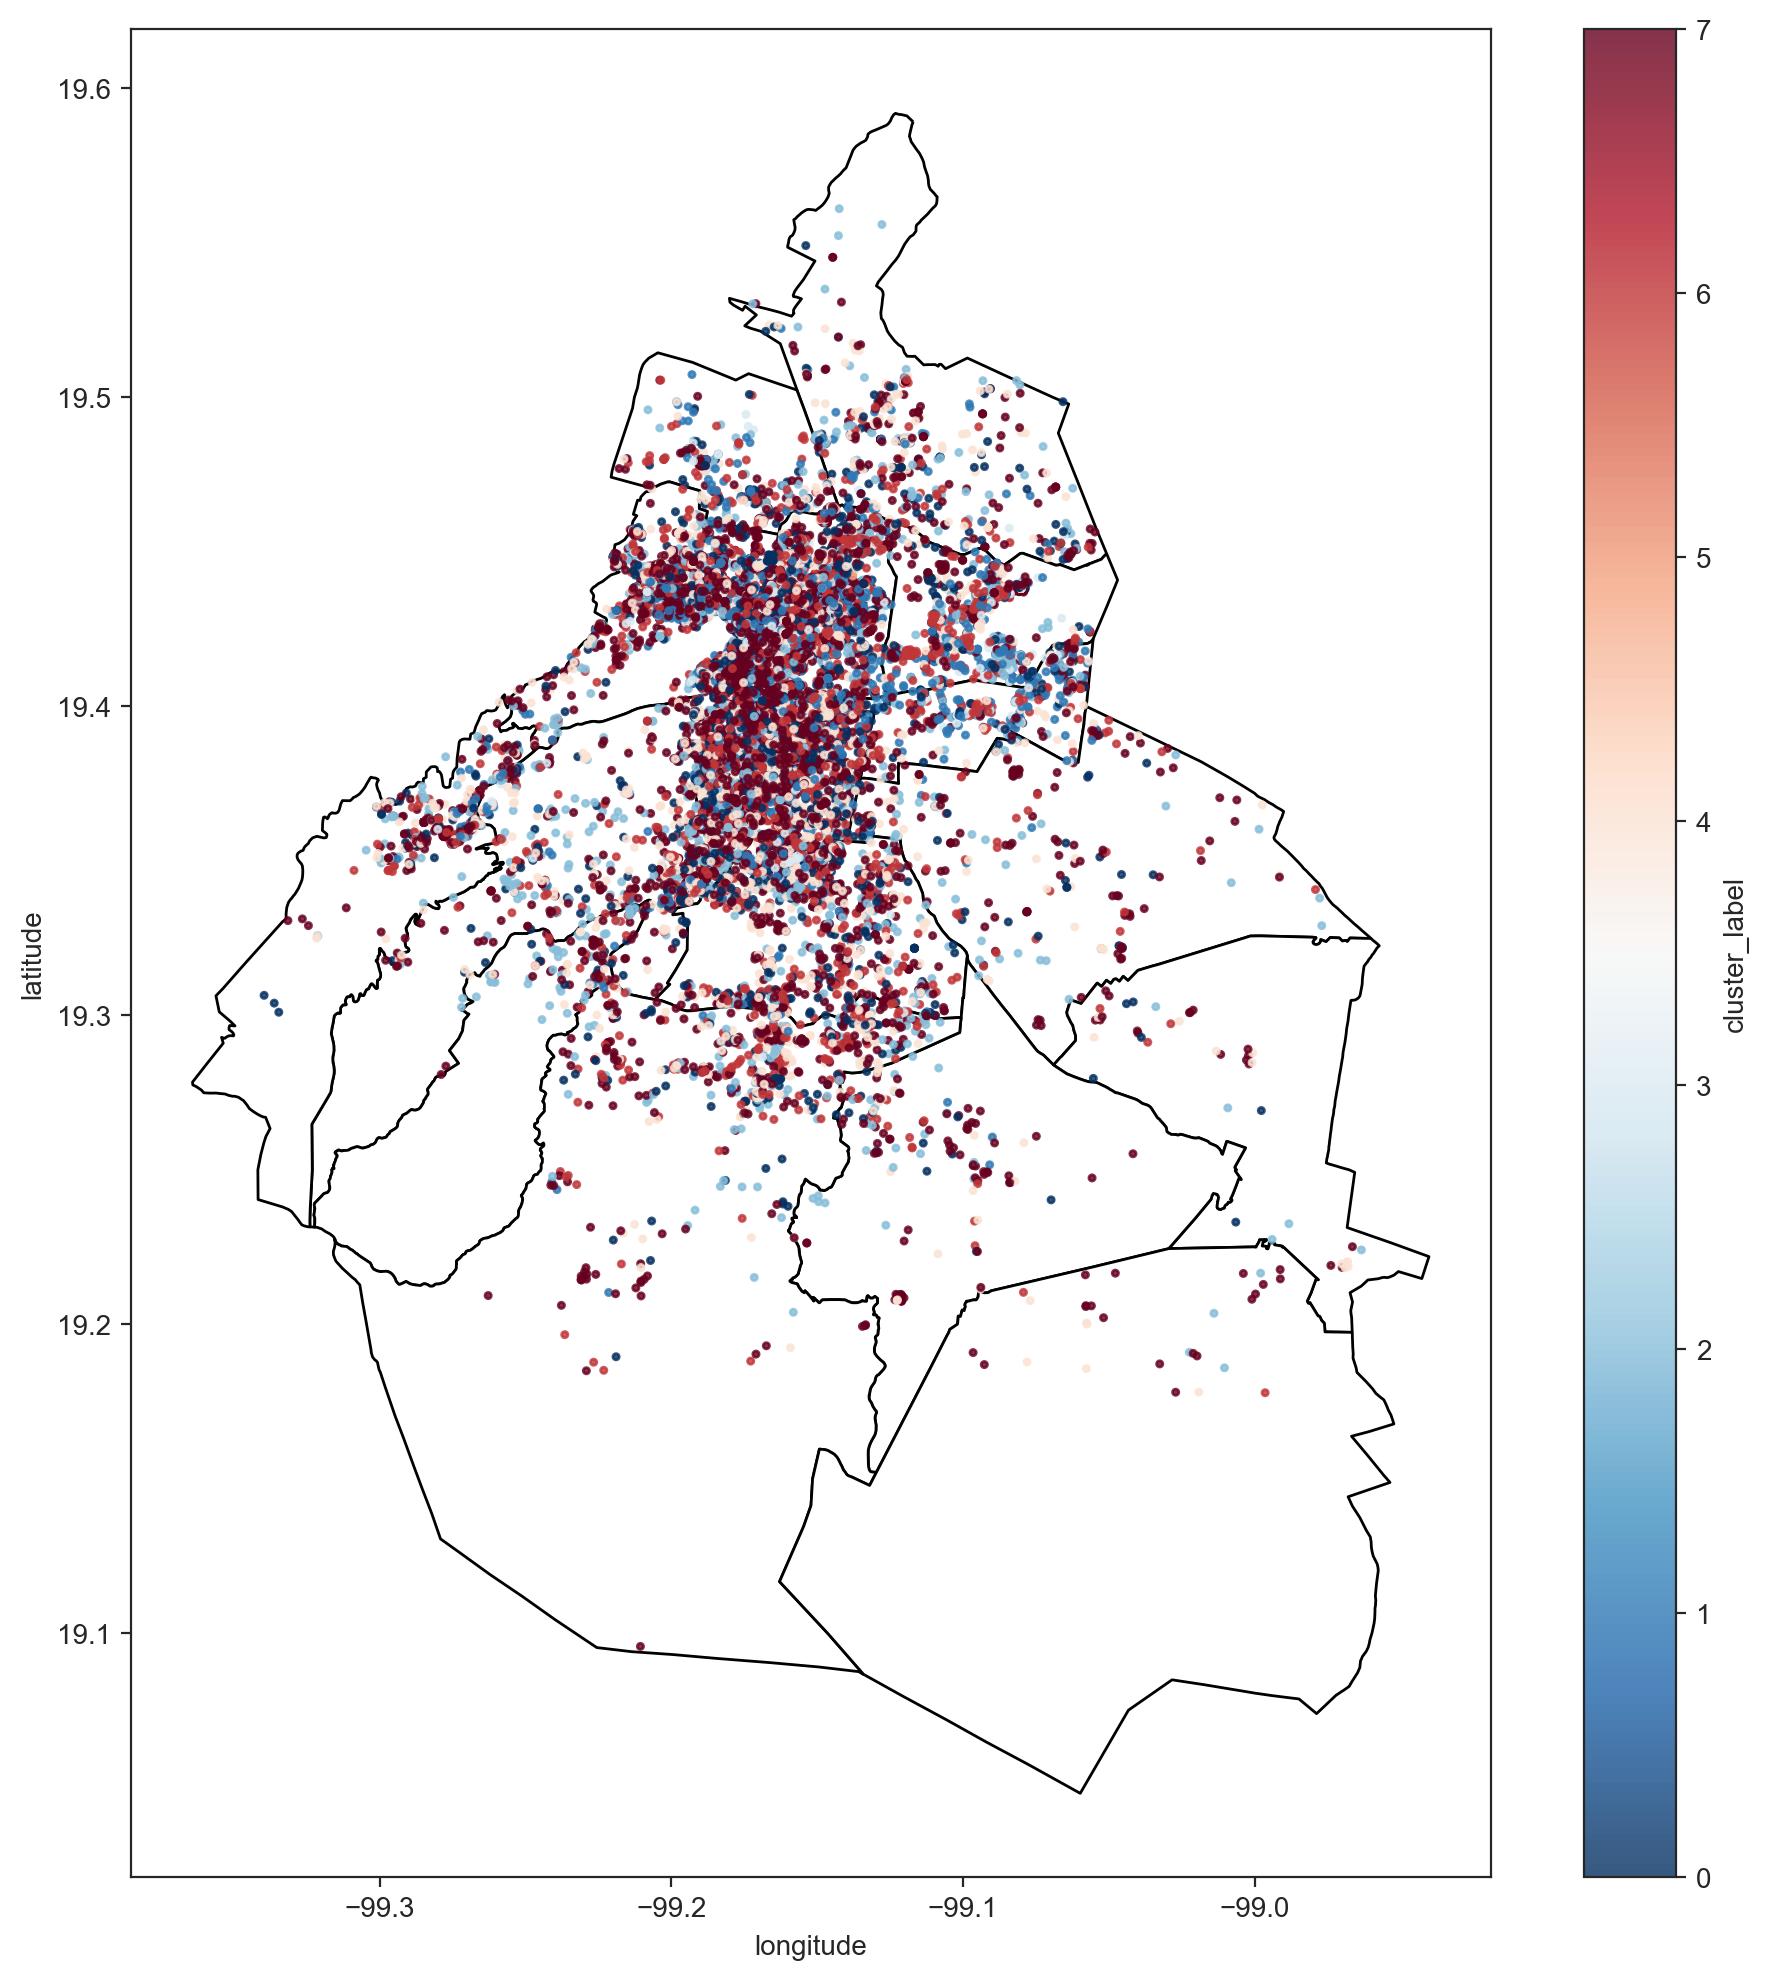

In [75]:
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.colors import ListedColormap

# Example: 8 Airbnb-inspired colors
colors = [
    "#FF0000",  # Rausch
    "#EB9915",  # Arches
    "#45A600",  # Babu
    "#000000",  # Hof
    "#3166EA",  # Foggy
    "#00AFE0",  # Light gray
    "#AE00FF",  # Extra: gold
    "#D600C8"   # Extra: indigo
]
# Create a colormap
airbnb_cmap = ListedColormap(colors[0:n_clusters], name='airbnb_map')

print(sys.version)
print(pd.__name__, pd.__version__)
print(gpd.__name__, gpd.__version__)
print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

cdmx = gpd.read_file('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/mapa_mexico')\
    .query('CVE_EDO=="09"')\
    .set_index('CLAVE')

base = cdmx.plot(color='white', edgecolor='black', scheme="naturalbreaks")

above = df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.8,
    ax=base,
    s=5, #listings['price']*.01,
    #label="price",
    figsize=(12, 12),
    c='cluster_label',
    cmap=plt.get_cmap('RdBu_r'),
    colorbar=True)
plt.show()

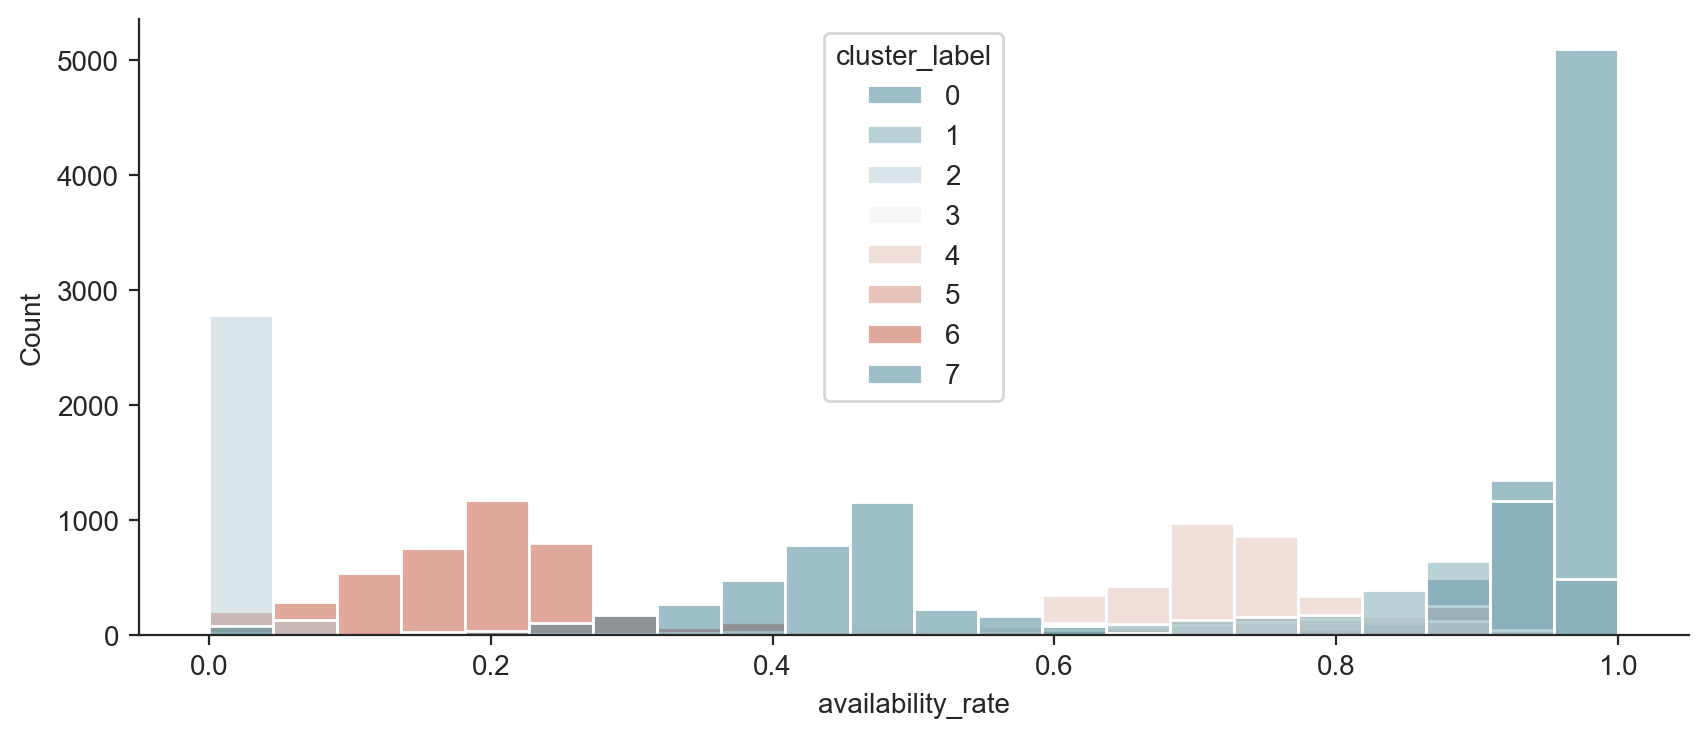

In [36]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="availability_rate", hue="cluster_label", palette=sns.diverging_palette(220, 20, n=7))
sns.despine()
plt.show()

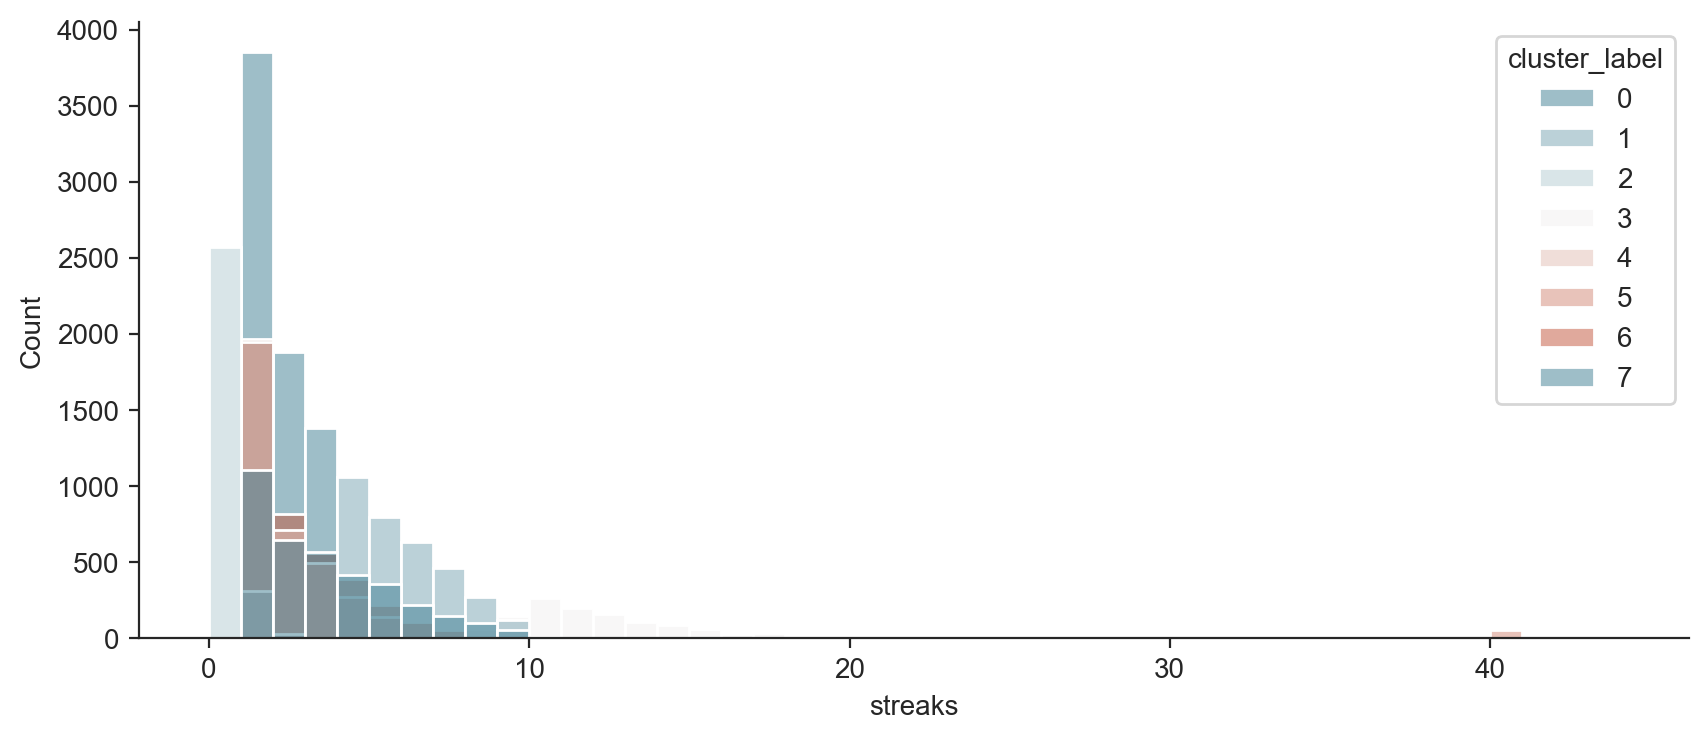

In [37]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="streaks", hue="cluster_label", binwidth=1, palette=sns.diverging_palette(220, 20, n=7))
sns.despine()
plt.show()

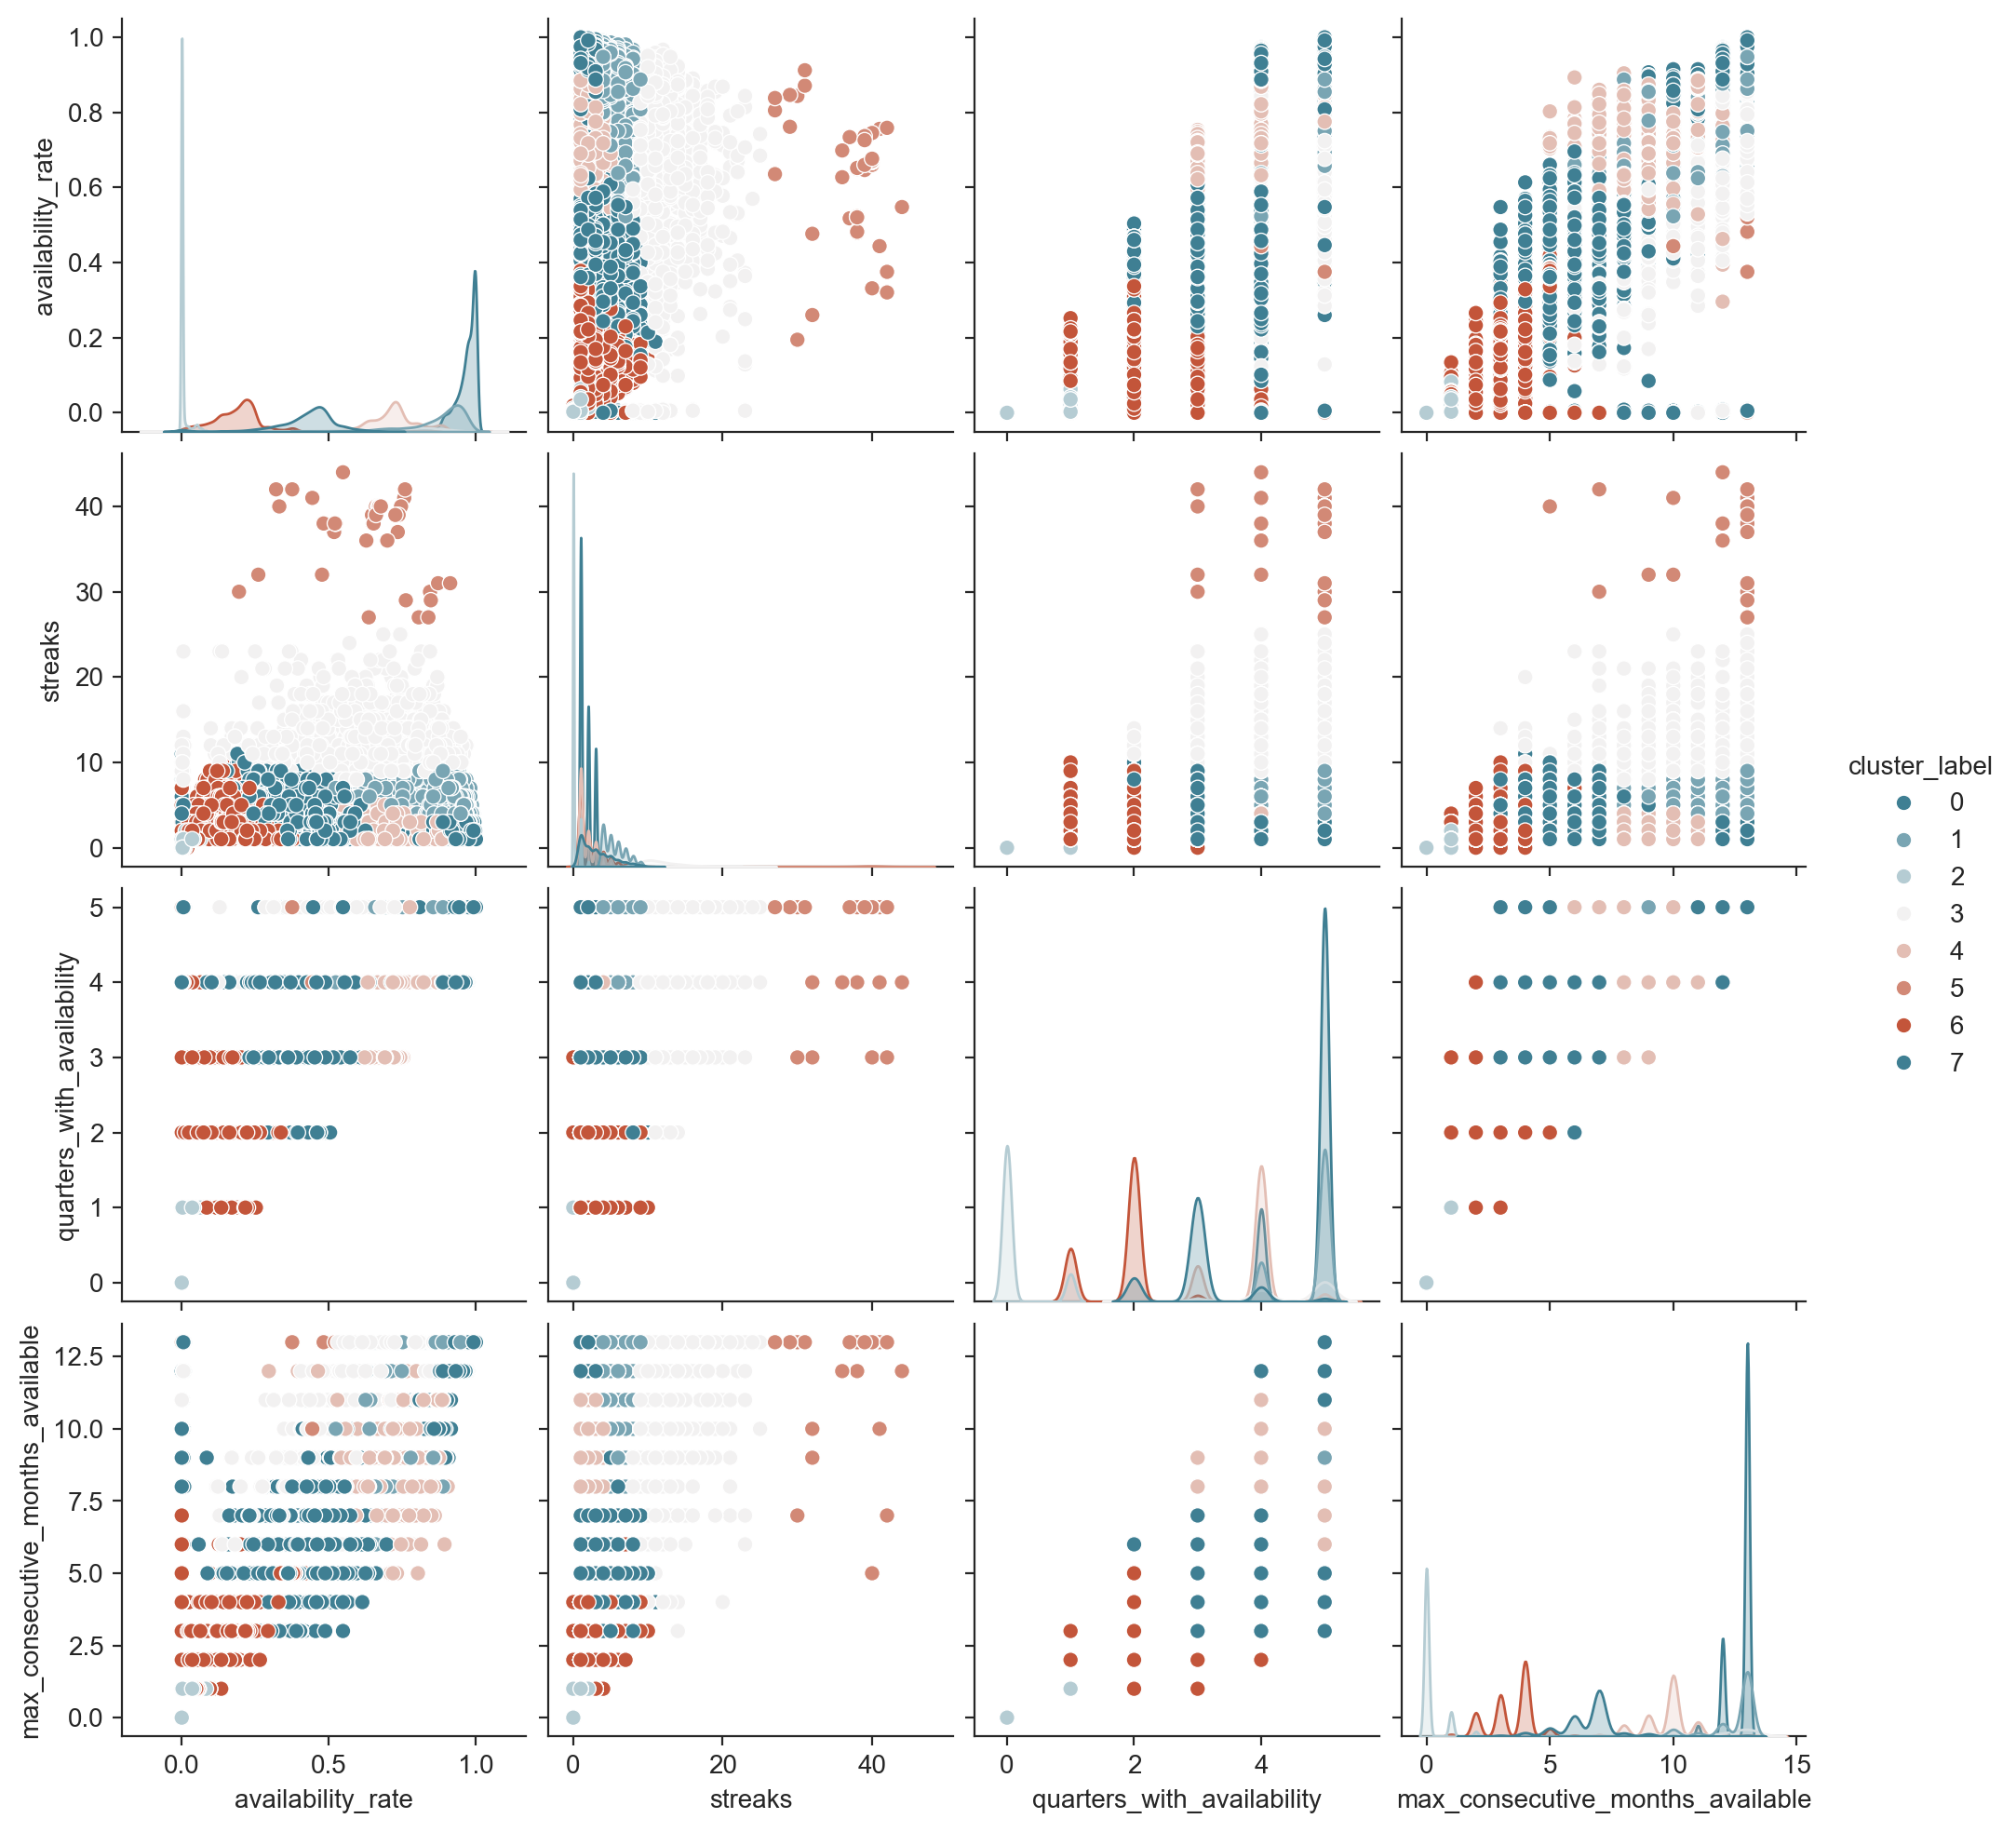

In [38]:
sns.pairplot(df[features_selected + ['cluster_label']], 
             diag_kind='kde', 
             hue='cluster_label', 
             palette=sns.diverging_palette(220, 20, n=7))
sns.despine()
plt.show()

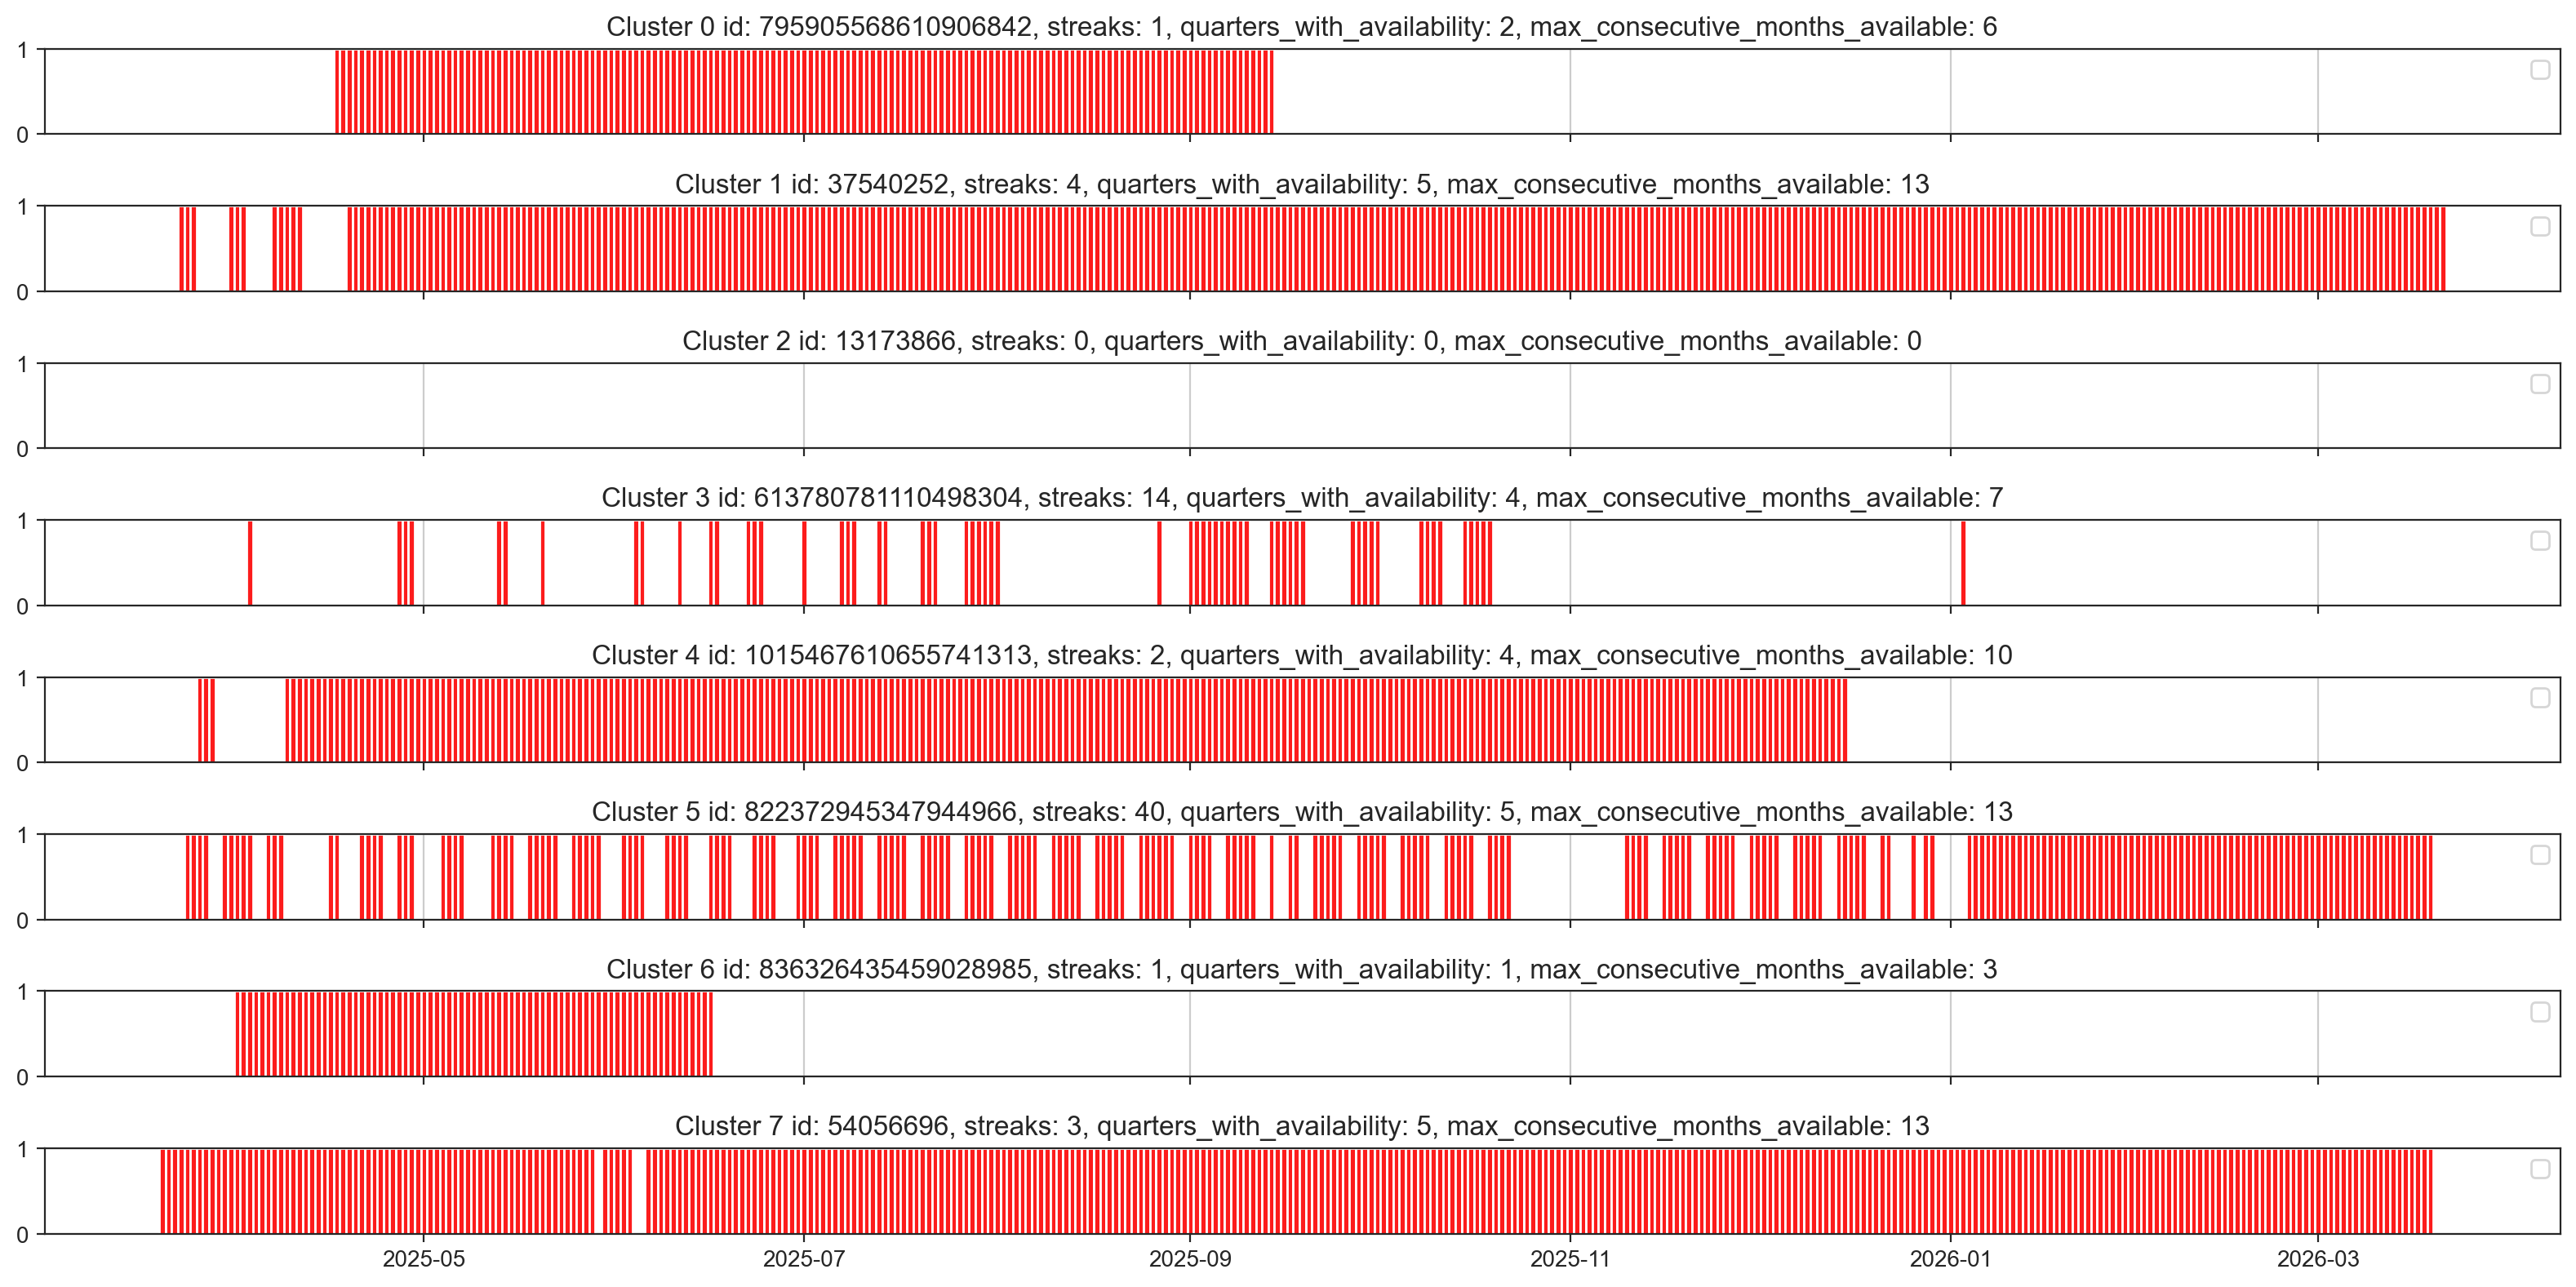

In [87]:
# Get the id of one listing 
df['id'] = listings['id']

# select one row by cluster label and grap the time series of availability
df_sample = df.groupby('cluster_label').apply(lambda x: x.sample(1)).reset_index(drop=True)

fig, axes = plt.subplots(n_clusters, 1, figsize=(16, 8), sharex=True)

for i in range(n_clusters):
    # get id by cluster
    sample_streak = df_sample[df_sample['cluster_label'] == i]['streaks']
    sample_Q_w = df_sample[df_sample['cluster_label'] == i]['quarters_with_availability']
    sample_max_months = df_sample[df_sample['cluster_label'] == i]['max_consecutive_months_available']
    
    id_calendar = df_sample[df_sample['cluster_label'] == i]['id']
    aux_calendar = calendar[calendar['listing_id'] == int(id_calendar)]
    aux_calendar['available'] = aux_calendar['available'].map(lambda x: x == 't')

    # kind time serie
    # axes[i].plot(aux_calendar['date'], aux_calendar['available'].astype(int), marker='o', linestyle='-', color="#FF5A5F")

    # 'Availability (1=Available, 0=Not available)'
    axes[i].bar(aux_calendar['date'], aux_calendar['available'].astype(int), color="#FC1C1C", width=1.0, align='center')
    axes[i].set_title(f'Cluster {i} id: {int(id_calendar)}, streaks: {int(sample_streak)}, quarters_with_availability: {int(sample_Q_w)}, max_consecutive_months_available: {int(sample_max_months)}')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_ylim([0, 1])

plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()

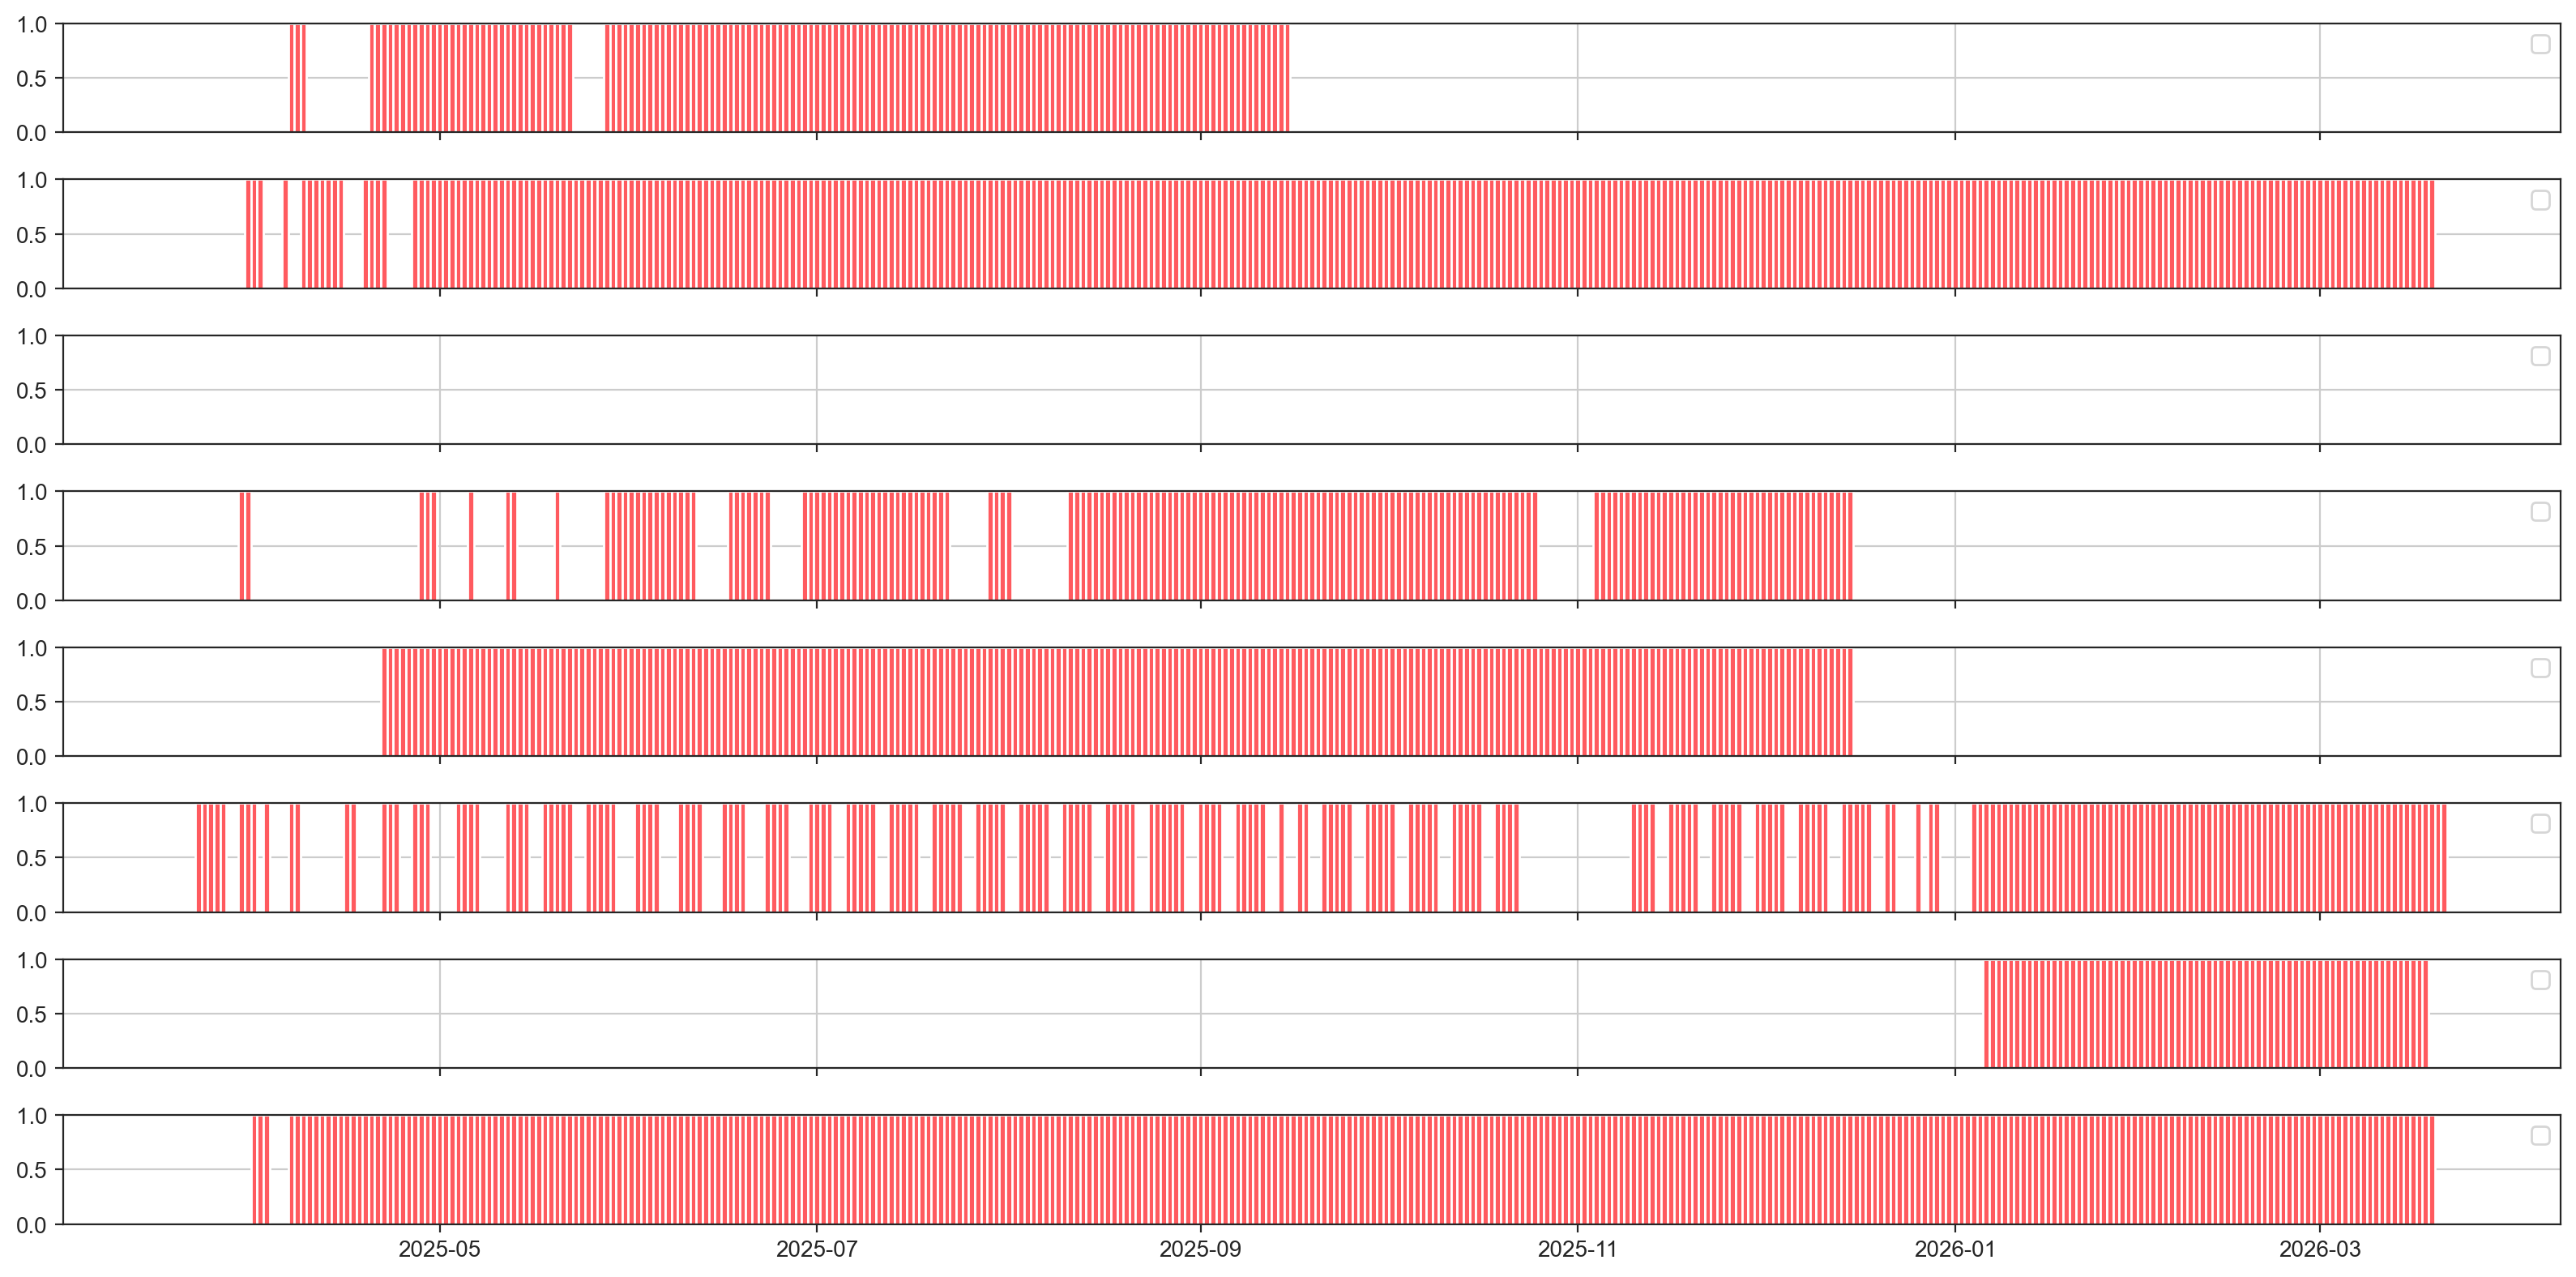

In [40]:
# Get the id of one listing 
df['id'] = listings['id']

# select one row by cluster label and grap the time series of availability
df_sample = df.groupby('cluster_label').apply(lambda x: x.sample(1)).reset_index(drop=True)

fig, axes = plt.subplots(n_clusters, 1, figsize=(16, 8), sharex=True)

for i in range(n_clusters):
    # get id by cluster
    sample_streak = df_sample[df_sample['cluster_label'] == i]['streaks']
    sample_Q_w = df_sample[df_sample['cluster_label'] == i]['quarters_with_availability']
    sample_max_months = df_sample[df_sample['cluster_label'] == i]['max_consecutive_months_available']
    
    id_calendar = df_sample[df_sample['cluster_label'] == i]['id']
    aux_calendar = calendar[calendar['listing_id'] == int(id_calendar)]
    aux_calendar['available'] = aux_calendar['available'].map(lambda x: x == 't')

    # kind time serie
    # axes[i].plot(aux_calendar['date'], aux_calendar['available'].astype(int), marker='o', linestyle='-', color="#FF5A5F")

    # 'Availability (1=Available, 0=Not available)'
    axes[i].bar(aux_calendar['date'], aux_calendar['available'].astype(int), color="#FF5A5F", width=1.0, align='center')
    # axes[i].set_title(f'Cluster {i} id: {int(id_calendar)}, streaks: {int(sample_streak)}, quarters_with_availability: {int(sample_Q_w)}, max_consecutive_months_available: {int(sample_max_months)}')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_ylim([0, 1])

plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()

In [ ]:
# ref: https://medium.com/airbnb-engineering/from-data-to-insights-segmenting-airbnbs-supply-c88aa2bb9399